## Проект: Линейные модели в машинном обучении

[yandex practicum link](https://practicum.yandex.ru/learn/data-scientist/courses/de273a30-17f9-476d-8f2f-ff55c7fe17fb/sprints/197573/topics/2fdf9dfb-8a1d-463d-9695-4a95fc16cdcf/lessons/6871f4e2-79b3-4902-975f-f5760c64b759/)

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Антон! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

### Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». <font color='red'>Он хочет купить бурёнок, чтобы расширить поголовье стада коров.</font>  Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы <font color='red'>каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. </font> А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать <font color='green'>**две прогнозные модели**</font>  для отбора бурёнок в поголовье:
1) Первая будет прогнозировать возможный удой коровы (<font color='red'>целевой признак Удой</font>);

2) Вторая — рассчитывать вероятность получить вкусное молоко от коровы (<font color='red'>целевой признак Вкус молока</font>).

С помощью модели нужно отобрать коров по двум критериям:
- <font color='red'>средний удой за год — не менее 6000 килограммов;</font>
- <font color='red'>молоко должно быть вкусным.</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


здорово что подсветил ключевые моменты

### Описание данных

Файл ferma_main

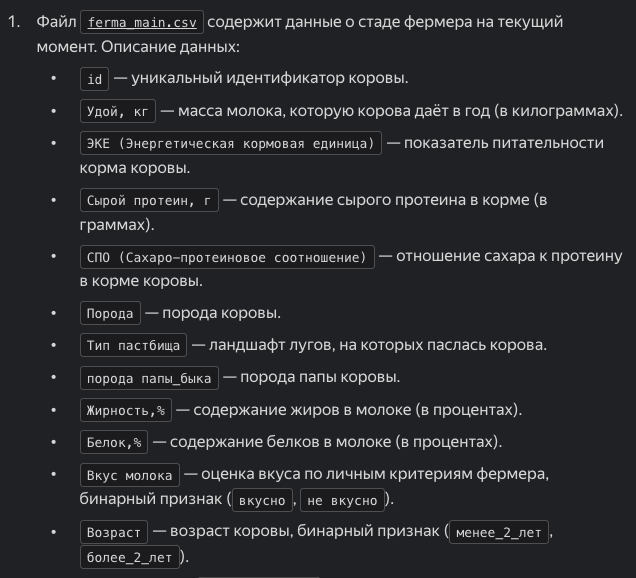

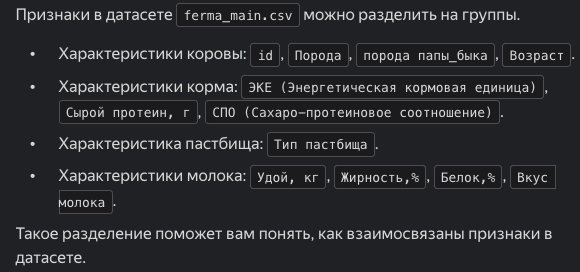

Файлы ferma_dad и cow_buy

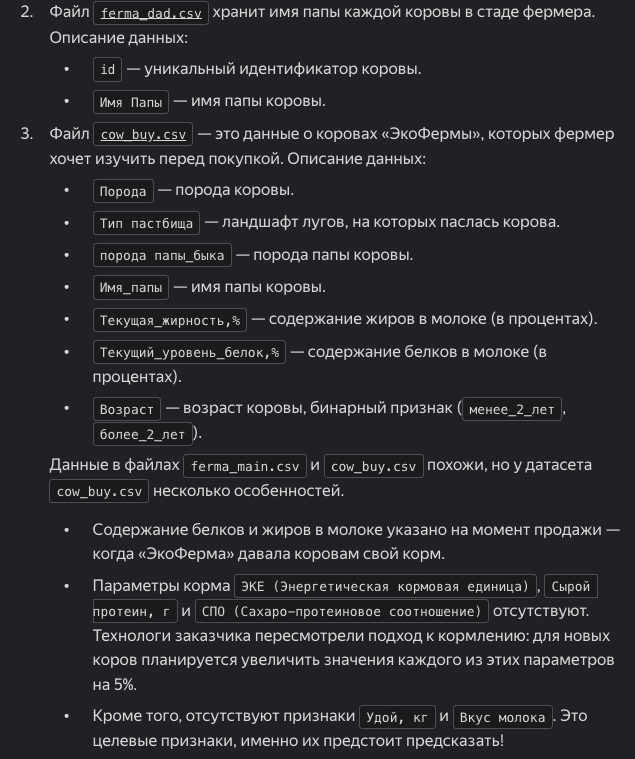

### Шаг 1. Загрузка и изучение данных

## Загрузка и изучение данных

In [69]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random

# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# библиотеки для логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 

<div class="alert alert-warning">


Совет:

    

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 



In [70]:
# добавим библиотеку для построения scatter диаграмм рассеяния с тренд-линиями
import plotly.express as px 
import plotly.graph_objects as go

In [71]:
import math

In [72]:
try:
    ferma_df = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
    ferma_dad_df= pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv', sep=';',decimal=',')
except FileNotFoundError:
    ferma_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_main.csv', sep=';', decimal=',')
    ferma_dad_df= pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_dad.csv', sep=';',decimal=',')
    cow_buy_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/cow_buy.csv', sep=';', decimal=',')




<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Ошибка:    
    

- Не забываем указать decimal. Сразу после чтения файла, убеждаемся что данные прочитаны верно, если нет, сразу вносим корректировки в чтение, иначе у нас неопределён верный тип данных, и многие методы и функции корректно не отработают
     


<div class="alert alert-warning">



Совет 🤔:
    
    
- Ещё есть такой интересный аргумент при чтении как  parse_dates - позволяет указать какие столбцы в DataFrame содержат даты и время. Как раз для этого проекта. Если у нас установлен верный тип данных, это значит что мы можем легко вытасиквать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию
    
    
Пригодится для будущих проектов

    
    



<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил, в принципе понятна цель. Сразу верно указывать тип данных, которые являются float значениями - явно указать, что они разделены запятыми</div>

#### Основной датасет по коровам

In [73]:
ferma_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [74]:
ferma_df.shape

(634, 12)

In [75]:
ferma_df.id.nunique()

629

Так, строк в датасете 634, а коров - 629. Значит id 5 коров повторяются. Запомнили

Поменяем название столбцов:
- переведем на английский
- устраним пробелы

In [76]:
ferma_df.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [77]:
ferma_df.rename(columns={
                        'Удой, кг':'milk_yield_kg',
                        'ЭКЕ (Энергетическая кормовая единица)':'energy_feed_unity',
                        'Сырой протеин, г': 'crude_protein_g',
                        'СПО (Сахаро-протеиновое соотношение)':'sugar_protein_ratio',
                        'Порода':'cow_breed',
                        'Тип пастбища':'pasture_type',
                        'порода папы_быка':'bull_breed',
                        'Жирность,%': 'milk_fat_percent',
                        'Белок,%' : 'percent_protein_in_milk',
                        'Вкус молока': 'milk_taste',
                        'Возраст':'cow_age'
                    
}, inplace=True)




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 помнишь о стилистике


Молодец что используешь rename,  чтобы не думать о порядке. 


    
 <div class="alert alert-warning">


Совет: 


 
- можно было автоматизировать процесс воспользовавшись  .lower, а с помощью регуляризации    (или .rename) избавиться от точек, % итп, а если надо организовать нижние подчёркивание (привезти название столбцов к змеиному коду). Пример регулярного выражения:  
     
	df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]
 



In [78]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,milk_taste,cow_age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


#### Датасет по связи коров с быками (кто отец коровы)

In [79]:
ferma_dad_df.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [80]:
ferma_dad_df.shape

(629, 2)

Все верно, всего 629 уникальных коров, информация соответствует инфе из основного датасета

Посмотрим, сколько всего уникальных отцов-быков

In [81]:
ferma_dad_df['Имя Папы'].nunique()

4

Всего 4 быка. Посмотрим их имена

In [82]:
ferma_dad_df['Имя Папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Переведем название столбца Имя Папы в удобный вид

In [83]:
ferma_dad_df.rename(columns={'Имя Папы': 'bull_name'}, inplace=True)

In [84]:
ferma_dad_df.head()

,id,bull_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


#### Датасет о коровах, которых планируют купить

In [85]:
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [86]:
cow_buy_df.shape

(20, 7)

Переименуем столбцы

In [87]:
cow_buy_df.rename(columns={
                            'Порода': 'cow_breed',
                            'Тип пастбища': 'pasture_type',
                            'порода папы_быка': 'bull_breed',
                            'Имя_папы':'bull_name',
                            'Текущая_жирность,%': 'milk_fat_percent',
                            'Текущий_уровень_белок,%': 'percent_protein_in_milk',
                            'Возраст':'cow_age'

}, inplace=True)

In [88]:
cow_buy_df.head()

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


всего 20 коров рассматриватся к приобретению

### Шаг 2. Предобработка данных

#### 2.1 Основной датасет по коровам

- проверить наличие пустых значений
- проверить корректность типов данных
- проверить явные и неявные дубликаты
- трансформировать колонку milk_taste (1 - вкусно, 0 - не вкусно)
- трансформировать колонку cow_age на классы - в зависимости от того, сколько их

##### 2.1.1 Пустые значения

In [89]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       634 non-null    int64  
 1   milk_yield_kg            634 non-null    int64  
 2   energy_feed_unity        634 non-null    float64
 3   crude_protein_g          634 non-null    int64  
 4   sugar_protein_ratio      634 non-null    float64
 5   cow_breed                634 non-null    object 
 6   pasture_type             634 non-null    object 
 7   bull_breed               634 non-null    object 
 8   milk_fat_percent         634 non-null    float64
 9   percent_protein_in_milk  634 non-null    float64
 10  milk_taste               634 non-null    object 
 11  cow_age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


Пустых значений нет

##### 2.1.2 Корректность типов данных

Столбцы energy_feed_unity,sugar_protein_ratio,milk_fat_percent,percent_protein_in_milk нужно перевести в тип данных float

Причем, сами значения разделены запятой, а должны быть разделены точкой.

Используем функцию и применим к этим столбцам

In [90]:
"""
columns=['energy_feed_unity', 
          'sugar_protein_ratio',
          'milk_fat_percent', 
          'percent_protein_in_milk']

ferma_df[columns] = ferma_df[columns]\
          .apply(lambda x: x.str.replace(',','.').astype('float'))

"""

"\ncolumns=['energy_feed_unity', \n          'sugar_protein_ratio',\n          'milk_fat_percent', \n          'percent_protein_in_milk']\n\nferma_df[columns] = ferma_df[columns]          .apply(lambda x: x.str.replace(',','.').astype('float'))\n\n"

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Это уже не нужно будет


<div class="alert alert-info"> <b>Комментарии студента:</b> да, согласен, так технологичнее намного. закомментил, чтобы код не выполнялся</div>

In [91]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       634 non-null    int64  
 1   milk_yield_kg            634 non-null    int64  
 2   energy_feed_unity        634 non-null    float64
 3   crude_protein_g          634 non-null    int64  
 4   sugar_protein_ratio      634 non-null    float64
 5   cow_breed                634 non-null    object 
 6   pasture_type             634 non-null    object 
 7   bull_breed               634 non-null    object 
 8   milk_fat_percent         634 non-null    float64
 9   percent_protein_in_milk  634 non-null    float64
 10  milk_taste               634 non-null    object 
 11  cow_age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [92]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,milk_taste,cow_age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


##### 2.1.3 Явные и неявные дубликаты

In [93]:
ferma_df.duplicated().sum()

5

In [94]:
ferma_df[ferma_df.duplicated()]

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,milk_taste,cow_age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [95]:
ferma_df.drop_duplicates(inplace=True)

In [96]:
ferma_df.duplicated().sum()

0

Избавились от явных дубликатов

In [97]:
ferma_df.id.nunique()


629

В датасете осталось 629 коров с уникальным id. Это означает, что каждая корова уникальна. Даже если некоторые данные у разных коров совпадают.

неявных дубликатов быть не может

##### 2.1.4 Трансформация колонки milk_taste

In [98]:
ferma_df.milk_taste.unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [99]:
ferma_df.milk_taste = ferma_df.milk_taste.apply(lambda x: 1 if x=='вкусно' else 0)

заодно уточним название столбца

In [100]:
ferma_df.rename(columns={'milk_taste':'is_tasty'}, inplace=True)

In [101]:
ferma_df.sample(5)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,is_tasty,cow_age
119,120,5882,14.6,1812,0.890,Вис Бик Айдиал,Холмистое,Соверин,3.58,3.076,1,более_2_лет
36,37,6150,13.8,1702,0.930,Вис Бик Айдиал,Холмистое,Айдиалл,3.11,3.074,1,более_2_лет
256,257,5287,12.3,1929,0.890,РефлешнСоверинг,Равнинное,Соверин,3.27,3.076,0,менее_2_лет
52,53,5517,12.2,1905,0.895,Вис Бик Айдиал,Равнинные,Айдиалл,3.34,3.079,0,менее_2_лет
345,346,6290,15.5,1817,0.940,РефлешнСоверинг,Холмистое,Соверин,3.71,3.073,1,более_2_лет


##### 2.1.5 Трансформация колонки cow_age

In [102]:
ferma_df.cow_age.unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

классов "Возраст" всего два. Заменим их на бинарную классификацию: старше 2 лет = 1, младше = 0

Причем будем считать молодой коровой - до двух лет, старой - более двух лет (для имени столбца)

In [103]:
ferma_df.cow_age = ferma_df.cow_age.apply(lambda x: 1 if x=='более_2_лет' else 0)

In [104]:
ferma_df.rename(columns={'cow_age':'is_old'}, inplace=True)

In [105]:
ferma_df.sample(5)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old
97,98,6262,15.1,1985,0.930,Вис Бик Айдиал,Равнинное,Соверин,3.25,3.075,0,1
77,78,5871,14.7,1795,0.895,Вис Бик Айдиал,Равнинные,Айдиалл,3.61,3.082,1,1
174,175,7043,15.7,2041,0.940,Вис Бик Айдиал,Холмистое,Айдиал,3.71,3.074,1,1
66,67,6006,14.6,2327,0.930,РефлешнСоверинг,Холмистое,Айдиалл,3.71,3.077,1,1
50,51,5593,13.4,1675,0.895,Вис Бик Айдиал,Равнинные,Айдиалл,3.25,3.075,1,0


In [106]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       629 non-null    int64  
 1   milk_yield_kg            629 non-null    int64  
 2   energy_feed_unity        629 non-null    float64
 3   crude_protein_g          629 non-null    int64  
 4   sugar_protein_ratio      629 non-null    float64
 5   cow_breed                629 non-null    object 
 6   pasture_type             629 non-null    object 
 7   bull_breed               629 non-null    object 
 8   milk_fat_percent         629 non-null    float64
 9   percent_protein_in_milk  629 non-null    float64
 10  is_tasty                 629 non-null    int64  
 11  is_old                   629 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 63.9+ KB


##### 2.1.6 Выводы 

- пустых значений нет
- дубликаты убрали
- типы данных исправили
- столбцы вкус молока (1-вкусно, 0 - невкусно) и возраст коровы (1-старше 2 лет, 0 - младше) привели в бинарный вид

#### 2.2 Предобработка датасета по быкам

In [107]:
ferma_dad_df.head()

,id,bull_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Повторы быков будут - их всего 4 шт на ферме. каждой корове (их 629) соответствует свой папа-бык.

предобработки не требуется

#### 2.3 Предобработка датасета по покупным коровам

Помним, что их 20 шт, посмотрим на весь датасет

Еще раз запомним тот факт, что данные в столбцах milk_fat_percent и percent_protein_in_milk - Содержание белков и жиров в молоке указаны на момент продажи — <font color='red'>когда «ЭкоФерма» давала коровам свой корм.</font> 

In [108]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Кстати, примечательно, что порода папы-быка отнюдь не является определяющим породы коровы. Породы папы и дитя могут отличаться.

и еще одна особенность данных: порода быка определена одним словом, а порода коровы - несколькими.

Например, порода быка "Соверин", а коровы "РефлешнСоверинг"

Возможно, потребуется привести данные в один формат

In [109]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cow_breed                20 non-null     object 
 1   pasture_type             20 non-null     object 
 2   bull_breed               20 non-null     object 
 3   bull_name                20 non-null     object 
 4   milk_fat_percent         20 non-null     float64
 5   percent_protein_in_milk  20 non-null     float64
 6   cow_age                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


А так, "проблемы" в общем-то те же:

- посмотреть пустые значения - их нет
- заменить типы данных для столбцов milk_fat_percent и percent_protein_in_milk на float 
- посмотреть дубликаты
- трансформировать столбец cow_age

In [110]:
cow_buy_df.duplicated().sum()

4

In [111]:
cow_buy_df[cow_buy_df.duplicated()]

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [112]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Да, целых 4 дубликата, уберем их

In [113]:
cow_buy_df.drop_duplicates(inplace=True)

In [114]:
cow_buy_df.duplicated().sum()

0

In [115]:
cow_buy_df.reset_index(drop=True, inplace=True)

In [116]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


Всего 16 коров для покупки

Трансформируем столбец с возрастом коровы по принципу пункта 2.1.5 для основного датасета

In [117]:
cow_buy_df.cow_age = cow_buy_df.cow_age\
    .apply(lambda x: 1 if x=='более_2_лет' else 0)

In [118]:
cow_buy_df.rename(columns={'cow_age': 'is_old'}, inplace=True)

In [119]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,1
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,0
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,1
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,0
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,1
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,1


Выводы по датасету с коровами для покупки

- пустых значений нет
- дубликаты убрали - всего 16 коров
- колонку с возрастом коров преобразовали
- вероятно потребуется трансформация колонок с породами: видно, что их всего две (Соверин и Айдиал), причем для основного датасета коров фермы тоже

#### 2.4  Породы коров и быков

Посмотрим еще раз на породы коров и быков в обоих датасетах: существующие на ферме и доступные к продаже

In [120]:
# породы коров на ферме
ferma_df.cow_breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [121]:
# породы быков-отцов коров на ферме
ferma_df.bull_breed.unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [122]:
# породы коров на продажу
cow_buy_df.cow_breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [123]:
# породы быков-отцов коров на продажу
cow_buy_df.bull_breed.unique()

array(['Айдиал', 'Соверин'], dtype=object)

Вывод:
- всего в данных изучаются два типа пород коров и быков - "Соверин" и "Айдиал" (соответствует [статье](https://studbooks.net/1129082/agropromyshlennost/osnovnye_linii_golshtinskogo_skota) о "линиях" или породах коров)

- нашлись опечатки в породе быков-отцов коров на ферме (Айдиалл и Айдиал)

Приведем все к единому виду - и для коров и для быков в обоих датасетах

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Редко кто обращает на это внимание


In [124]:
def rename_breed(some_name):
    
    if some_name == 'Вис Бик Айдиал' or  some_name == 'Айдиалл':
        some_name= 'Айдиал'
    elif some_name== 'РефлешнСоверинг':
        some_name= 'Соверин'
    else: some_name= some_name
    return some_name

In [125]:
for dataset in [ferma_df, cow_buy_df]:
    for col in ['cow_breed', 'bull_breed']:
        dataset[col] = dataset[col].apply(rename_breed)
        

In [126]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,1
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,1
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,1
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,1
5,Соверин,равнинное,Соверин,Геркулес,3.63,3.053,0
6,Айдиал,равнинное,Соверин,Буйный,3.57,3.079,1
7,Соверин,холмистое,Айдиал,Буйный,3.40,3.079,0
8,Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,1
9,Соверин,равнинное,Соверин,Геркулес,3.73,3.073,1


In [127]:
ferma_df.sample(10)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old
145,146,5263,12.3,1960,0.850,Айдиал,Равнинное,Соверин,3.44,3.072,0,0
47,48,6561,15.8,1932,0.930,Соверин,Холмистое,Айдиал,3.71,3.074,0,1
334,335,6036,15.6,2084,0.950,Соверин,Холмистое,Соверин,3.73,3.077,1,1
19,20,5698,14.3,1759,0.895,Соверин,Холмистое,Соверин,3.49,3.072,1,1
286,287,6679,15.7,2267,0.950,Айдиал,Холмистое,Соверин,3.31,3.074,1,1
240,241,5568,13.4,1733,0.880,Айдиал,Равнинное,Соверин,3.63,3.069,0,0
140,141,5397,13.1,1666,0.850,Айдиал,Холмистое,Соверин,3.58,3.075,1,0
68,69,6179,15.2,2122,0.930,Айдиал,Холмистое,Айдиал,3.48,3.080,0,1
625,626,5513,12.9,1700,0.880,Соверин,Равнинное,Соверин,3.64,3.073,1,0
34,35,5356,12.9,1734,0.885,Айдиал,Равнинные,Айдиал,3.11,3.075,0,0


- привели породы коров и быков к одному формату (Айдиал и Соверин)
- устранили опечатку

На этом этапе можно перевести породы быков и коров в бинарный вид (их всего два)

Пусть Соверин - это класс 1, Айдиал - класс 0

In [128]:
for dataset in [ferma_df, cow_buy_df]:
    for col in ['cow_breed', 'bull_breed']:
        dataset[col] = dataset[col].apply(lambda x: 1 if x=='Соверин' else 0)
    dataset.rename(columns={'cow_breed': 'cow_is_sovering', 'bull_breed':'bull_is_sovering'}, inplace=True)    

    

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Это можно было и не делать


<div class="alert alert-info"> <b>Комментарии студента:</b> почему? я далее использую этот признак для предсказания. Но да, это можно сделать на этапе кодировки OneHotCode</div>

In [129]:
ferma_df.sample(10)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_type,bull_is_sovering,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old
320,321,6601,16.5,1772,0.940,1,Равнинное,0,3.72,3.073,1,1
193,194,5570,12.7,1875,0.860,0,Равнинное,0,3.42,3.078,0,0
10,11,5591,13.7,1678,0.895,1,Холмистое,0,3.13,3.075,1,0
497,498,6584,16.4,2346,0.950,1,Равнинное,1,3.73,3.078,0,1
102,103,6248,15.9,2196,0.930,0,Равнинное,1,3.71,3.072,0,1
475,476,5708,13.2,1921,0.850,1,Равнинное,0,3.62,3.079,0,1
111,112,6862,15.6,2208,0.940,0,Холмистое,0,3.71,3.076,1,1
421,422,5982,13.8,1722,0.890,1,Холмистое,0,3.61,3.073,0,1
4,5,5302,12.8,1675,0.885,0,Равнинные,1,3.73,3.073,1,0
371,372,6592,15.4,1810,0.930,1,Равнинное,0,3.72,3.073,0,1


In [130]:
cow_buy_df

,cow_is_sovering,pasture_type,bull_is_sovering,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
0,0,холмистое,0,Геркулес,3.58,3.076,1
1,0,равнинное,1,Буйный,3.54,3.081,0
2,1,равнинное,1,Барин,3.59,3.074,1
3,1,холмистое,0,Буйный,3.40,3.061,1
4,1,равнинное,0,Буйный,3.64,3.074,1
5,1,равнинное,1,Геркулес,3.63,3.053,0
6,0,равнинное,1,Буйный,3.57,3.079,1
7,1,холмистое,0,Буйный,3.40,3.079,0
8,0,холмистое,1,Соловчик,3.73,3.055,1
9,1,равнинное,1,Геркулес,3.73,3.073,1


#### 2.5 Тип пастбища 


In [131]:
ferma_df.pasture_type.unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [132]:
cow_buy_df.pasture_type.unique()

array(['холмистое', 'равнинное'], dtype=object)

Результат: нужно привести к единому виду (нижний регистр, единое склонение) - так мы приведем тип пастбищ к двум классам и сразу же изменим их на бинарную классификацию: 
- назовем столбец is_hill 
- 1 - холмистая местность
- 0 - равнинная  

In [133]:
for dataset in [ferma_df, cow_buy_df]:
    dataset.pasture_type = dataset.pasture_type\
        .apply(lambda x: 1 if x in (['холмистое', 'Холмистое']) else 0)
    dataset.rename(columns={'pasture_type': 'pasture_is_hill'}, inplace=True)
        

In [134]:
ferma_df.sample(5)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old
115,116,6576,16.2,1818,0.930,0,0,0,3.70,3.073,1,1
283,284,5770,13.9,1732,0.880,0,1,1,3.64,3.073,0,1
77,78,5871,14.7,1795,0.895,0,0,0,3.61,3.082,1,1
367,368,5733,13.5,1986,0.890,0,0,1,3.65,3.077,0,1
344,345,5456,12.1,1788,0.840,1,1,1,3.33,3.078,1,0


In [135]:
cow_buy_df

,cow_is_sovering,pasture_is_hill,bull_is_sovering,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
0,0,1,0,Геркулес,3.58,3.076,1
1,0,0,1,Буйный,3.54,3.081,0
2,1,0,1,Барин,3.59,3.074,1
3,1,1,0,Буйный,3.40,3.061,1
4,1,0,0,Буйный,3.64,3.074,1
5,1,0,1,Геркулес,3.63,3.053,0
6,0,0,1,Буйный,3.57,3.079,1
7,1,1,0,Буйный,3.40,3.079,0
8,0,1,1,Соловчик,3.73,3.055,1
9,1,0,1,Геркулес,3.73,3.073,1


Напоследок примерджим имя быка к датасету фермы - и больше не будем обращаться к ferma_dad_df

In [136]:
ferma_df = ferma_df.merge(ferma_dad_df,
               how='left',
               on='id')

In [137]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old,bull_name
0,1,5863,14.2,1743,0.890,0,0,0,3.58,3.076,1,1,Буйный
1,2,5529,12.8,2138,0.890,0,0,1,3.54,3.079,1,0,Соловчик
2,3,5810,14.0,1854,0.885,1,1,1,3.59,3.074,0,1,Барин
3,4,5895,12.4,2012,0.885,1,1,0,3.40,3.075,0,1,Буйный
4,5,5302,12.8,1675,0.885,0,0,1,3.73,3.073,1,0,Барин


#### 2.5 Выводы по шагу 2



Посмотрим, что у нас получилось в итоге

In [138]:
for dataset in [ferma_df, ferma_dad_df, cow_buy_df]:
    print(dataset.info())
    print(dataset.shape)
    print(dataset.duplicated().sum())
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       629 non-null    int64  
 1   milk_yield_kg            629 non-null    int64  
 2   energy_feed_unity        629 non-null    float64
 3   crude_protein_g          629 non-null    int64  
 4   sugar_protein_ratio      629 non-null    float64
 5   cow_is_sovering          629 non-null    int64  
 6   pasture_is_hill          629 non-null    int64  
 7   bull_is_sovering         629 non-null    int64  
 8   milk_fat_percent         629 non-null    float64
 9   percent_protein_in_milk  629 non-null    float64
 10  is_tasty                 629 non-null    int64  
 11  is_old                   629 non-null    int64  
 12  bull_name                629 non-null    object 
dtypes: float64(4), int64(8), object(1)
memory usage: 68.8+ KB
None
(629, 13)
0

<cla

1) пустые значения убрали

2) типы данных привели в порядок
3) дубликаты удалили
4) колонки с категориальными признаками привели в бинарный вид: 
    - cow_is_sovering, bull_is_sovering (1 - порода Соверин, 0 - порода Айдиал)
    - is_tasty (1- вкусное молоко, 0 - невкусное)
    - pasture_is_hill (1 - холмистое пастбище, 0 - равнинное)
    - is_old (1 - корова старше 2 лет, 0 - младше двух лет)

5) остается только колонка bull_name с именами быков-отцов. Их всего 4 вида:
    - Буйный
    - Соловчик
    - Барин
    - Геркулес

Это категориальный признак, с ним решим на этапе подготовки данных

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



некорректность в данных почищина


### Шаг 3. Исследовательский анализ данных

#### 3.1 Статистический анализ данных



In [139]:
print('Статистические параметры датасета Ферма')
ferma_df.describe().T

Статистические параметры датасета Ферма


,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
milk_yield_kg,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
energy_feed_unity,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
crude_protein_g,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
sugar_protein_ratio,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
cow_is_sovering,629.0,0.406995,0.491665,0.000,0.000,0.000,1.000,1.000
pasture_is_hill,629.0,0.558029,0.497017,0.000,0.000,1.000,1.000,1.000
bull_is_sovering,629.0,0.494436,0.500367,0.000,0.000,0.000,1.000,1.000
milk_fat_percent,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
percent_protein_in_milk,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 


Думаешь о удобстве представления данных, применив метод df.T
<div>

In [140]:
print('Статистические параметры датасета Коровы на продажу')
cow_buy_df.describe().T

Статистические параметры датасета Коровы на продажу


,count,mean,std,min,25%,50%,75%,max
cow_is_sovering,16.0,0.500000,0.516398,0.000,0.0000,0.5000,1.00000,1.000
pasture_is_hill,16.0,0.500000,0.516398,0.000,0.0000,0.5000,1.00000,1.000
bull_is_sovering,16.0,0.625000,0.500000,0.000,0.0000,1.0000,1.00000,1.000
milk_fat_percent,16.0,3.571875,0.141620,3.340,3.4150,3.5850,3.69250,3.770
percent_protein_in_milk,16.0,3.068250,0.011264,3.046,3.0595,3.0735,3.07675,3.081
is_old,16.0,0.687500,0.478714,0.000,0.0000,1.0000,1.00000,1.000


In [141]:
cow_buy_df.milk_fat_percent.quantile(0.75)

3.6925

In [142]:
cow_buy_df.describe().T.loc['cow_is_sovering', 'std']

0.5163977794943222

#### 3.2 Графики параметров



In [143]:
ferma_df.columns

Index(['id', 'milk_yield_kg', 'energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_tasty', 'is_old', 'bull_name'],
      dtype='object')

Сначала сохраним имена столбцов в словарь, чтобы удобнее было читать графики

In [144]:
dict_names= \
{'milk_yield_kg': 'Удой, кг',
 'energy_feed_unity': 'ЭКЕ (Энергетическая кормовая единица)',
 'crude_protein_g': 'Сырой протеин, г',
 'sugar_protein_ratio': 'СПО (Сахаро-протеиновое соотношение)',
 'cow_is_sovering': 'корова породы соверин',
 'bull_is_sovering': 'бык породы соверин',
 'pasture_is_hill': 'пастбище холмистое',
 'milk_fat_percent': 'Жирность,%',
 'percent_protein_in_milk': 'Белок,%',
 'is_tasty': 'молоко вкусное',
 'is_old': 'корова старше двух лет',
 'bull_name': 'имя быка'}

Выделим числовые непрерывные, дискретные и категориальные признаки

In [145]:
numeric_columns=['milk_yield_kg', 'energy_feed_unity', 'crude_protein_g']

discrete_columns = ['sugar_protein_ratio', 'percent_protein_in_milk', 'milk_fat_percent']

categorical_columns = ['cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering','is_tasty', 'is_old', 'bull_name']

##### 3.2.1 Графики для непрерывных числовых признаков

Строим графики гистограмм и box-plot для непрерывных числовых признаков

Причем размер гистограммы сразу ограничим усами boxplot (то есть полтора межквартильного размаха) для читабельности

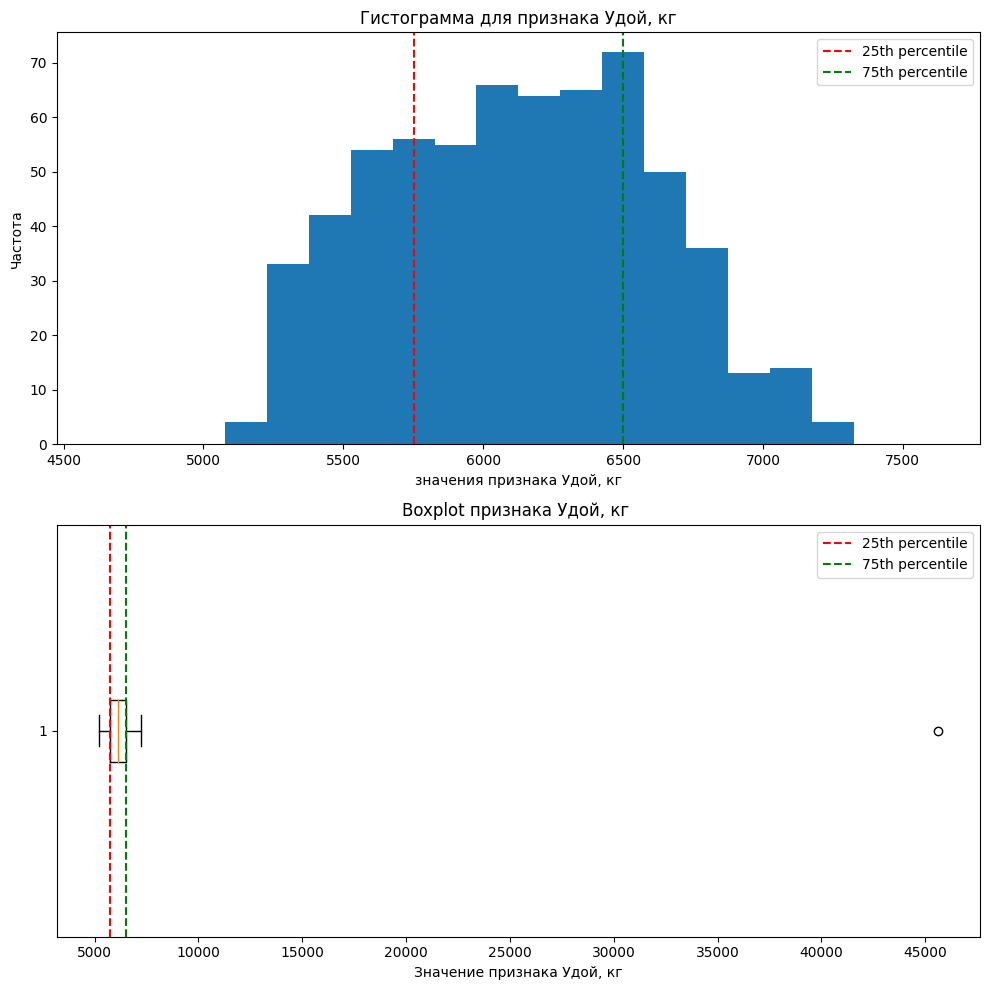

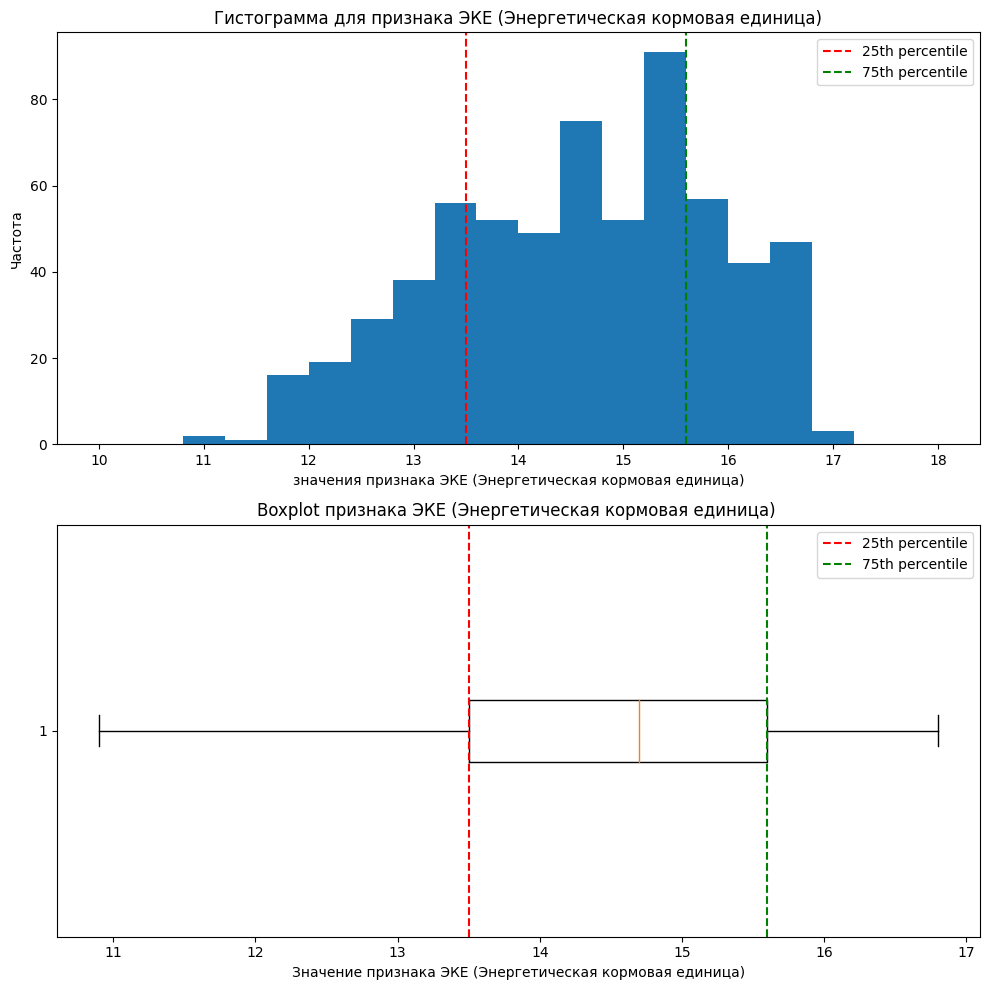

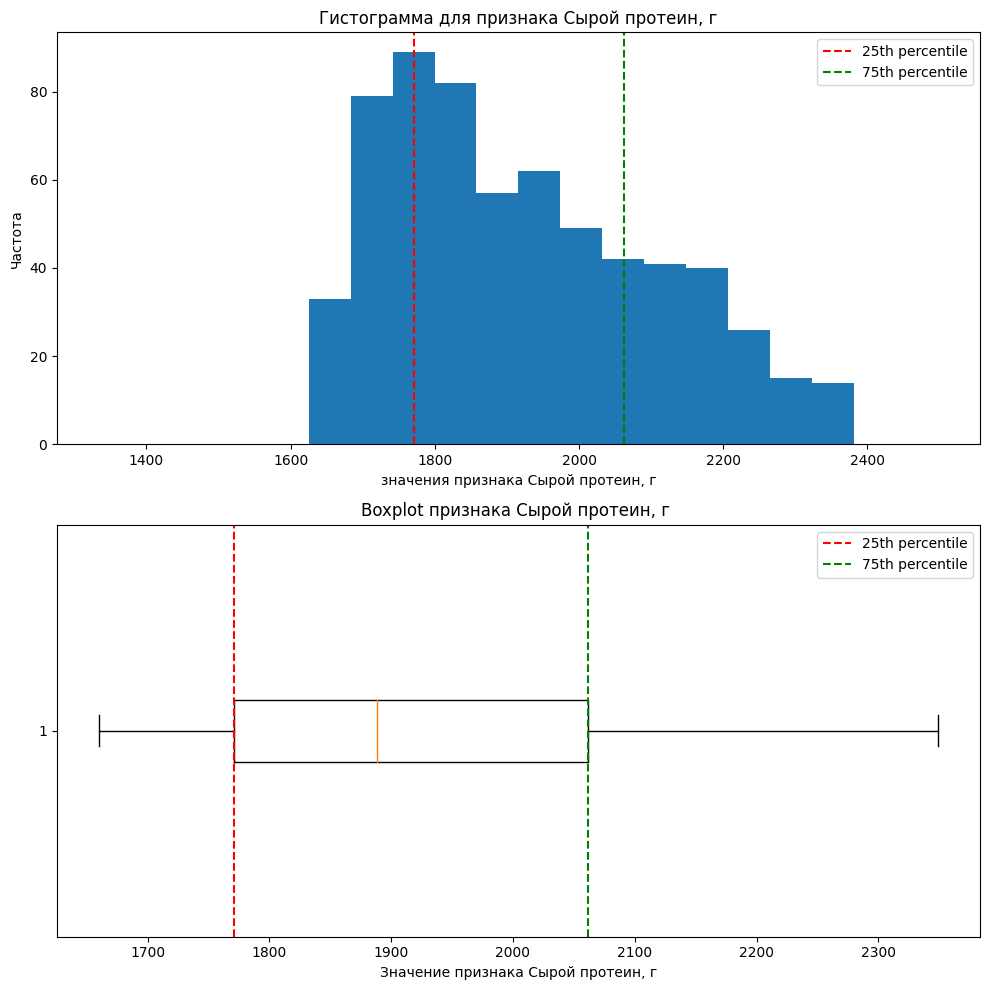

In [146]:


dataset_name= 'Ферма'
for col in numeric_columns:

    df_for_plot= ferma_df[col]

    # Рассчитываем квартили
    q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
    min_val = int(q25- 1.5*(q75-q25))
    max_val= int(q75 +  1.5*(q75-q25))

    # Создаем новый график
    plt.figure(figsize=(10, 10))

    # Строим гистограмму
    plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
    plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
    plt.title(f'Гистограмма для признака {dict_names[col]}')
    plt.xlabel(f'значения признака {dict_names[col]}')
    plt.ylabel(f'Частота')


    # Помечаем квартили на гистограмме
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()

    # Строим график boxplot
    plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
    plt.boxplot(df_for_plot, vert=False)
    plt.title(f'Boxplot признака {dict_names[col]} ')
    plt.xlabel(f'Значение признака {dict_names[col]}')

    # Помечаем квартили на boxplot
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()


    # Показываем графики
    plt.tight_layout()  # Для автоматического выравнивания графиков
    plt.show()


        


<div class="alert alert-success">
<font size="5">
<b>Комментарий ревьюера</b></font>





Успех:

Верно что для количественных признаков использованы как гистограммы, так и ящика с усами. Здорово Что используешь subplot




<div class="alert alert-warning">


Совет 🤔:



 
- а ещё бы тебе советовал использовать библиотеку    [seaborn](https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/), она строит  симпатичнее и проще matplotlib


- советую написать функцию, смотри сколько однотипного кода.  Ты можешь создать универсальную функцию (к чем и надо стермиться),  которую будешь использовать во всех дальнейших проектах - очень удобно.  Ведь мы во всех проектах  строим графики для категориальных и количественных признаков
    

<div class="alert alert-info"> <b>Комментарии студента:</b> я ее использую периодически, но меня напрягает то, что довольно муторно искать разрозненную информацию о построении графиков. Я бы даже отдельный обучающий курс по построению статистических графиков на знерщт прошел. Можешь что-то порекомендовать?</div>

Графиков гистограмм для датасета Коровы для продажи нет - там остались только дискретные признаки и категориальные признаки

In [147]:
ferma_df.sort_values('milk_yield_kg', ascending=False).head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old,bull_name
16,17,45616,11.5,1675,0.93,0,1,0,3.22,3.076,1,1,Буйный
70,71,7222,16.8,2157,0.95,0,1,0,3.70,3.076,1,1,Геркулес
135,136,7207,16.6,2343,0.94,0,1,0,3.72,3.078,1,1,Буйный
296,297,7201,15.8,2077,0.94,1,1,0,3.71,3.072,1,1,Буйный
294,295,7197,15.6,2241,0.94,1,1,0,3.71,3.075,1,1,Буйный


Что видим по графикам удоя: 

 Удой распределен нормально, однако есть выброс - значение больше 45 000 кг. Явная ошибка. Причем, все показатели по этой корове ниже, чем у остальных - скорее всего, значение удоя меньше в 10 раз. Но значение 4500 тоже будет выбросом - судя по boxplot. Поэтому просто удалим эту строку

In [148]:
ferma_df.drop(index=16, inplace=True)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Как вариант


Посмотрим на итог

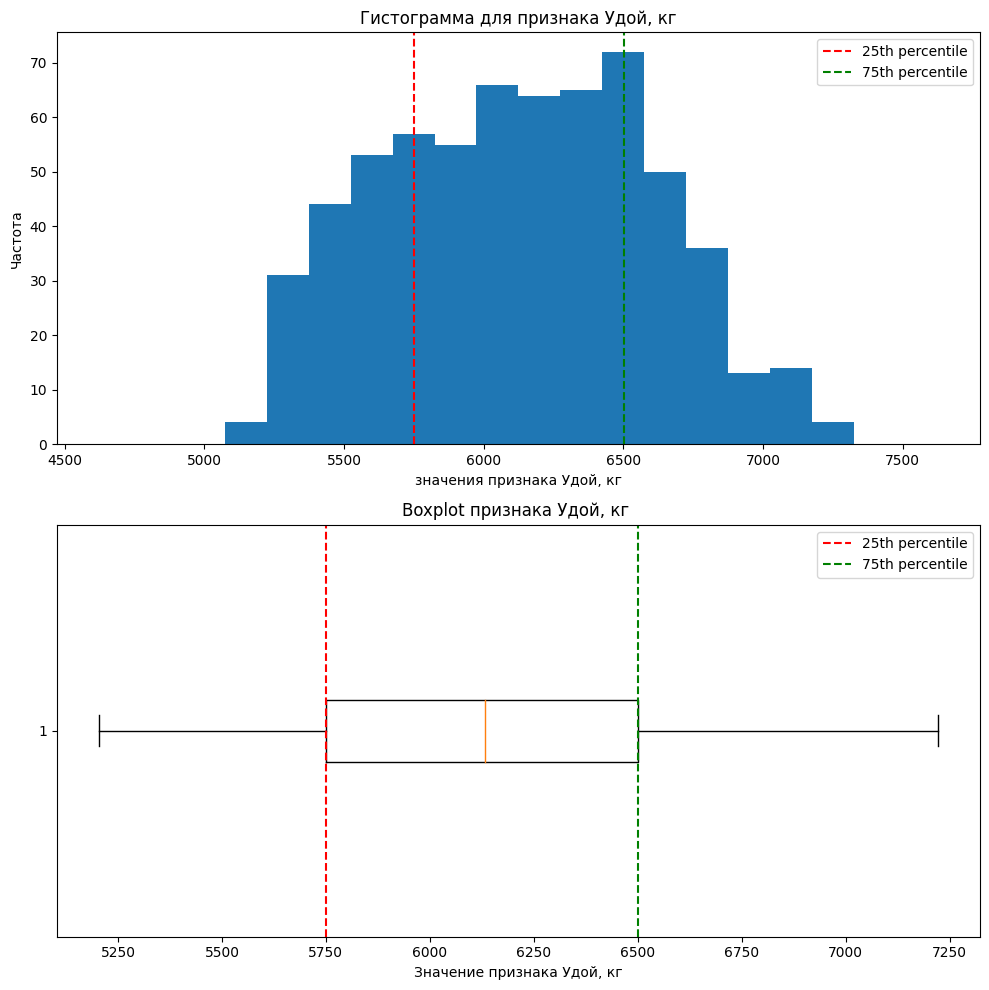

In [149]:


dataset_name= 'Ферма'


df_for_plot= ferma_df.milk_yield_kg
col = 'milk_yield_kg'

# Рассчитываем квартили
q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
min_val = int(q25- 1.5*(q75-q25))
max_val= int(q75 +  1.5*(q75-q25))

# Создаем новый график
plt.figure(figsize=(10, 10))

# Строим гистограмму
plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
plt.title(f'Гистограмма для признака {dict_names[col]}')
plt.xlabel(f'значения признака {dict_names[col]}')
plt.ylabel(f'Частота')


# Помечаем квартили на гистограмме
plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
plt.legend()

# Строим график boxplot
plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
plt.boxplot(df_for_plot, vert=False)
plt.title(f'Boxplot признака {dict_names[col]} ')
plt.xlabel(f'Значение признака {dict_names[col]}')

# Помечаем квартили на boxplot
plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
plt.legend()


# Показываем графики
plt.tight_layout()  # Для автоматического выравнивания графиков
plt.show()


    

**Выводы по графикам непрерывных признаков: (есть только у данных по Ферме)**

1) Удой: <font color='red'> этот показатель предстоит предсказать для коров на продажу</font> 
    - распределен нормально
    - обнаружен выброс - ошибка в данных - удален
    - половина значений лежит в диапазоне от 5750 до 6500 кг в год

Значит при прогнозировании удоя для коров, которых собираемся купить, мы стремимся попасть в этот диапазон




2) Энергетическая кормовая единица (показатель питательности корма коровы)
    - распределение похоже на нормально с небольшим смещением вправо и бимодальностью на значениях 14.5 и 15.5
    - не имеет выбросов
    - половина всех значений лежит в диапазоне от 13.5 до 15.7


3) Сырой протеин:
    - распределение похоже на нормальное со смещением влево
    - не имеет выбросов
    - половина всех значений лежит в диапазоне от 1780 г до 2070 г


##### 3.2.2 Графики для категориальных и дискретных признаков

Графики категориальных и дискретных признаков для датасета Ферма


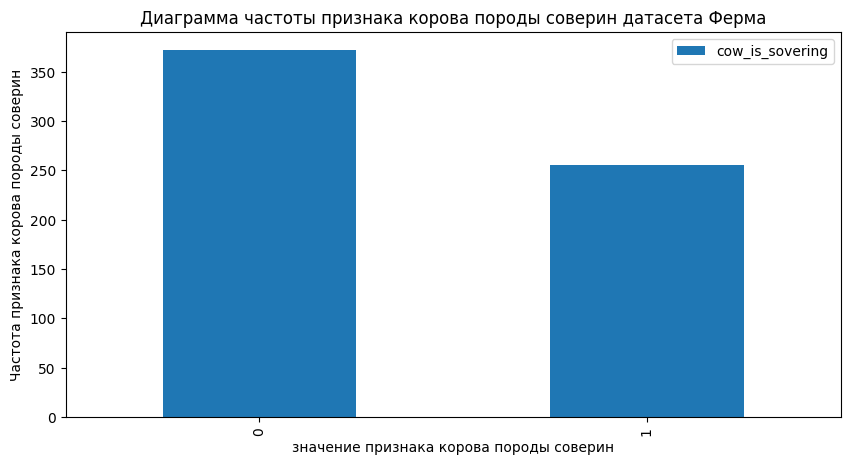

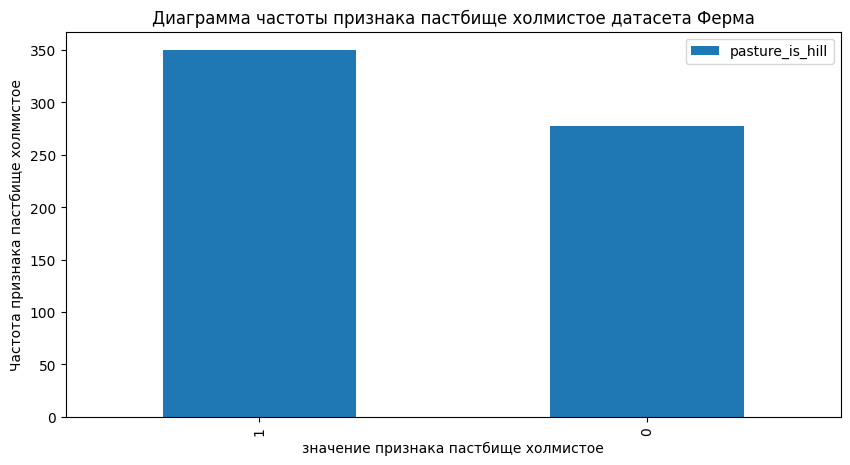

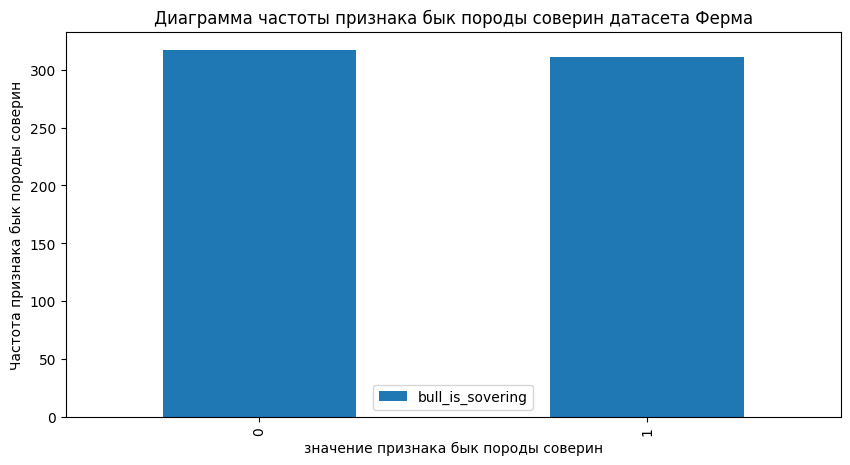

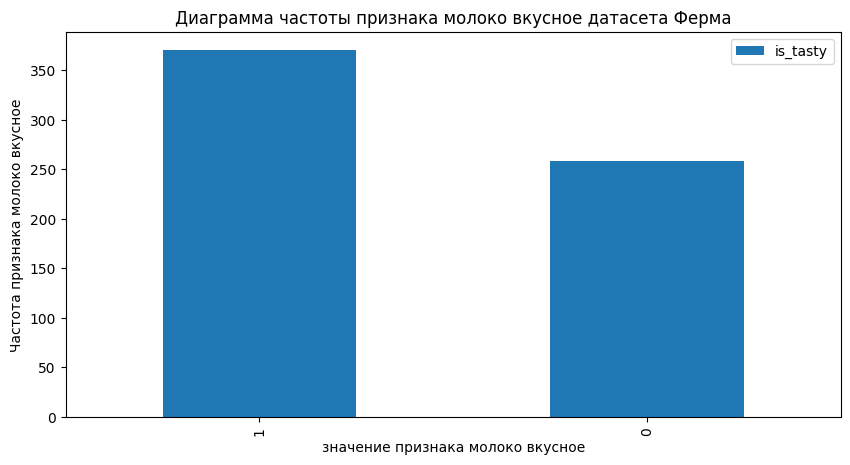

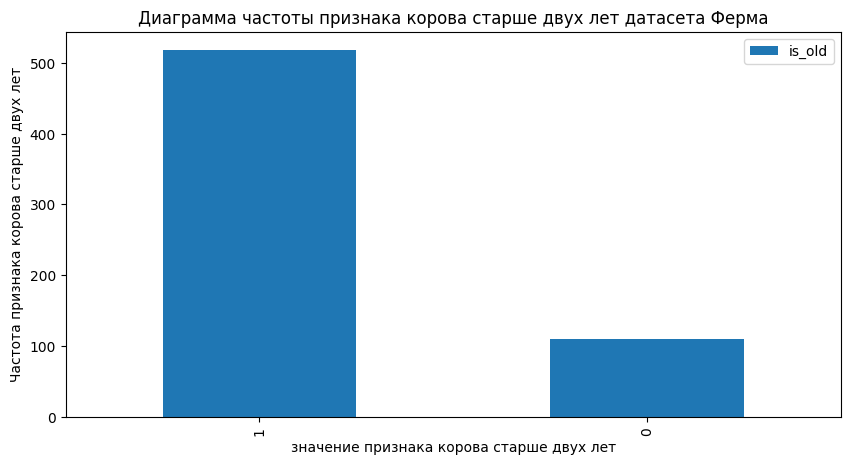

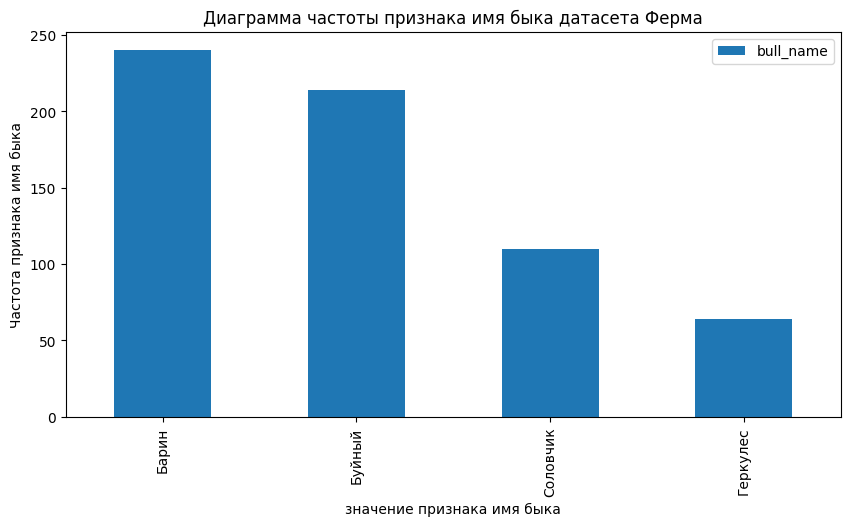

Графики категориальных и дискретных признаков для датасета Коровы для продажи


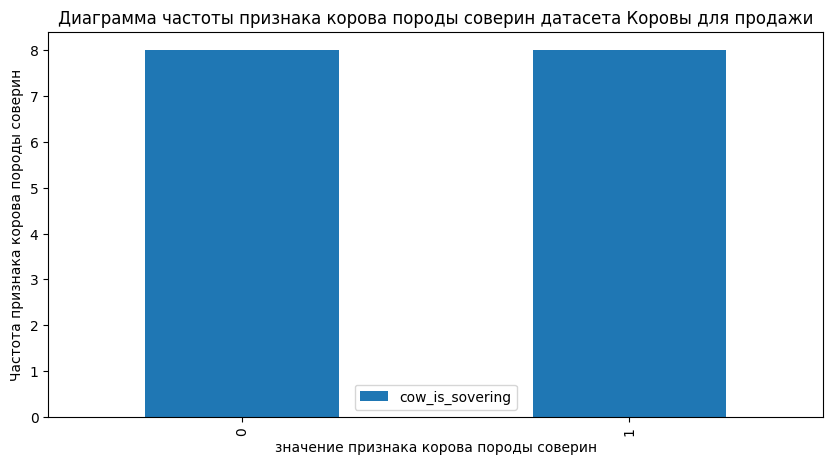

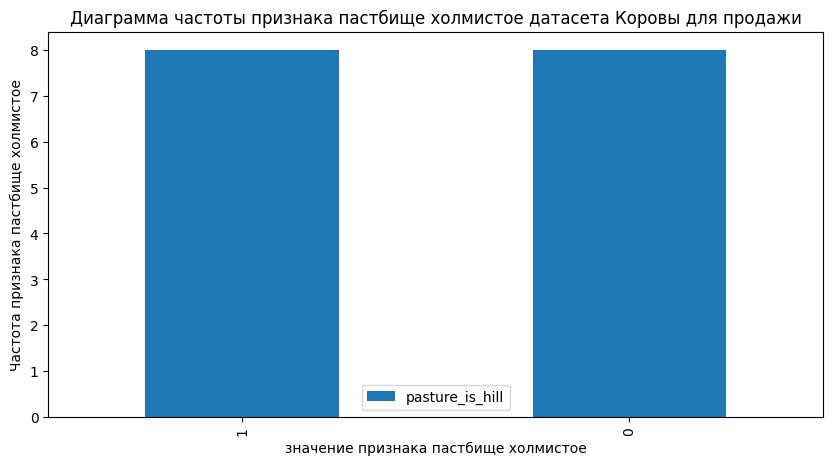

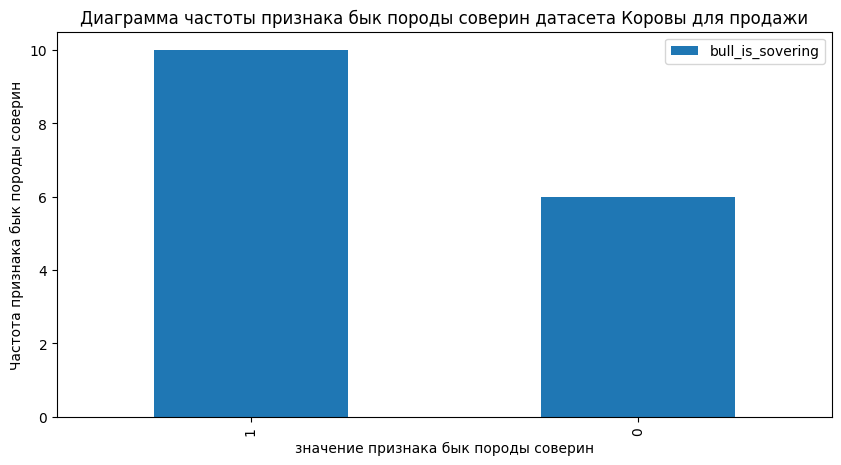

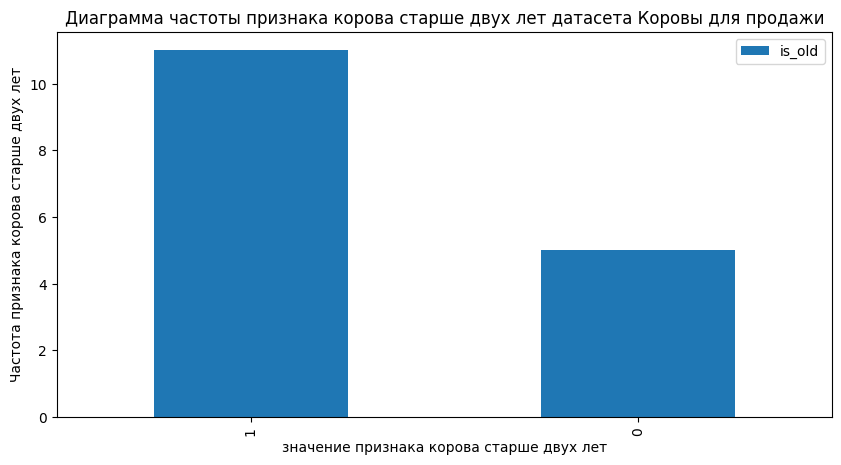

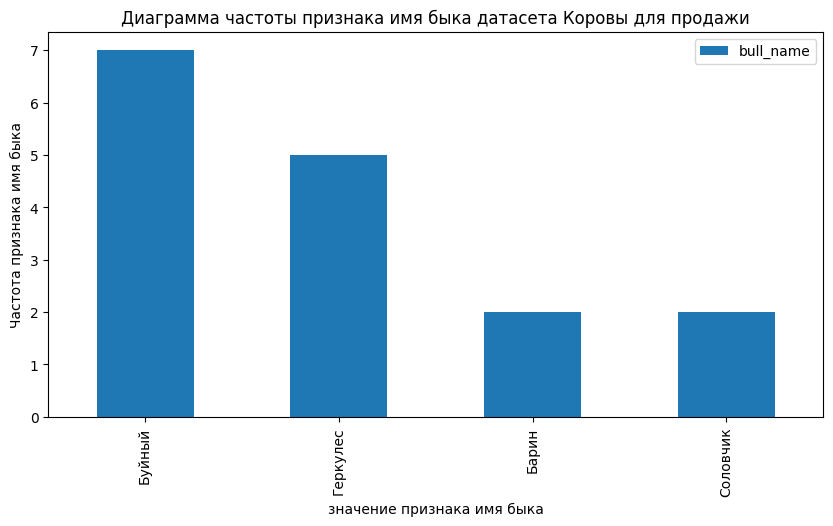

In [150]:

for ind in range(2):
    dataset = (ferma_df, cow_buy_df)[ind]
    dataset_name= ('Ферма', 'Коровы для продажи')[ind]
    
    print(f'Графики категориальных и дискретных признаков для датасета {dataset_name}')
    for col in categorical_columns:
        try:
            dataset[col].value_counts().plot(kind='bar', legend=True, figsize=(10,5))
            plt.title(f'Диаграмма частоты признака {dict_names[col]} датасета {dataset_name}')
            plt.xlabel(f'значение признака {dict_names[col]}')
            plt.ylabel(f'Частота признака {dict_names[col]}')
            plt.show()
            
        except KeyError:
            continue

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




Спо, жирность явно есть упорядочность в данных, а ты их построил так как будто это категориальные признаки, посчитав в количество для каждого значения. И непонятно что тогда у нас распределением.
    
Достаточно было разбить признаки на категориальные и количественные, построив соответствующий график для каждого, в чём смысл выделения дискретных непонятно. 

<div class="alert alert-info"> <b>Комментарии студента:</b> я сначала так и сделал - построил гистограммы и для дискретных. Однако, их внешний вид не показался мне разумным и информативным в отличие от столбчатых диаграмм.

Ниже я снова вывел внешний вид гистограмм: с ограничением между усов и без ограничений.

Теперь конечно нагляднее видно, что:
- данные по СПО, белку и жирности распределены ненормально
- есть выбросы 

Выводы поправил
 </div>

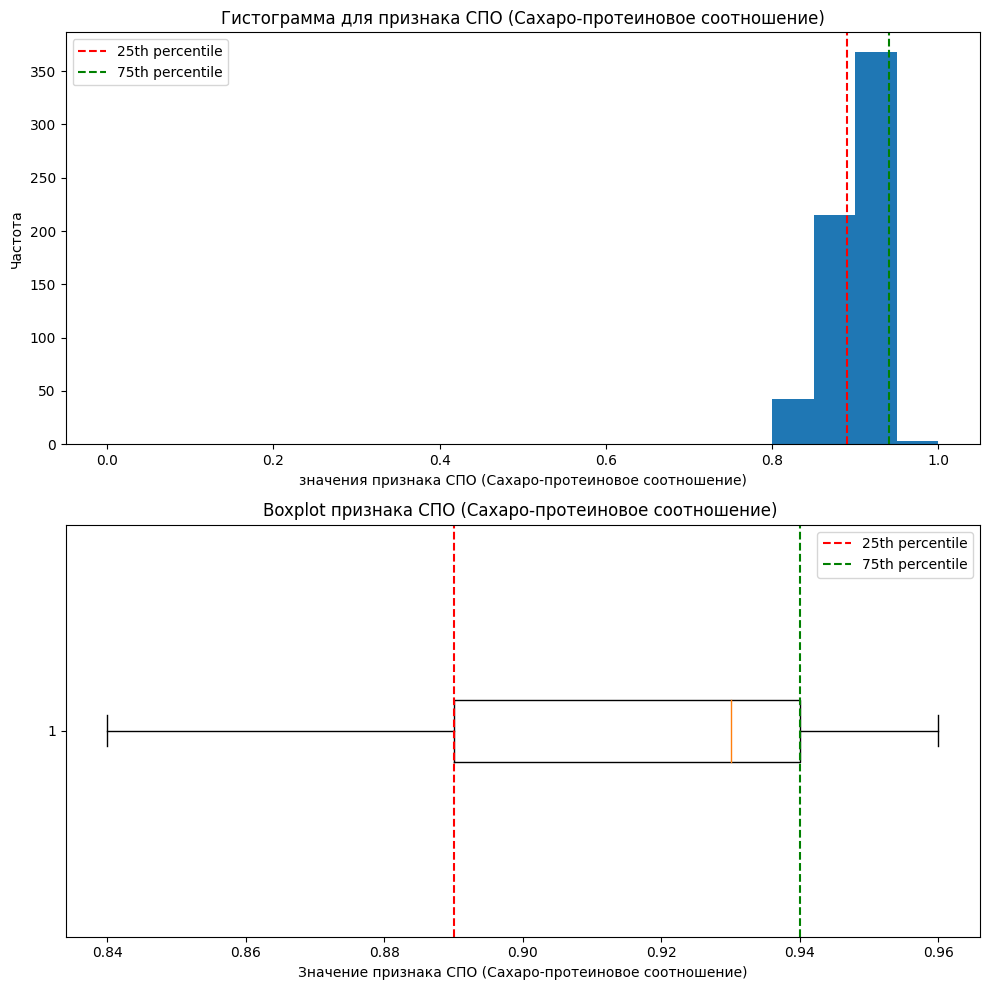

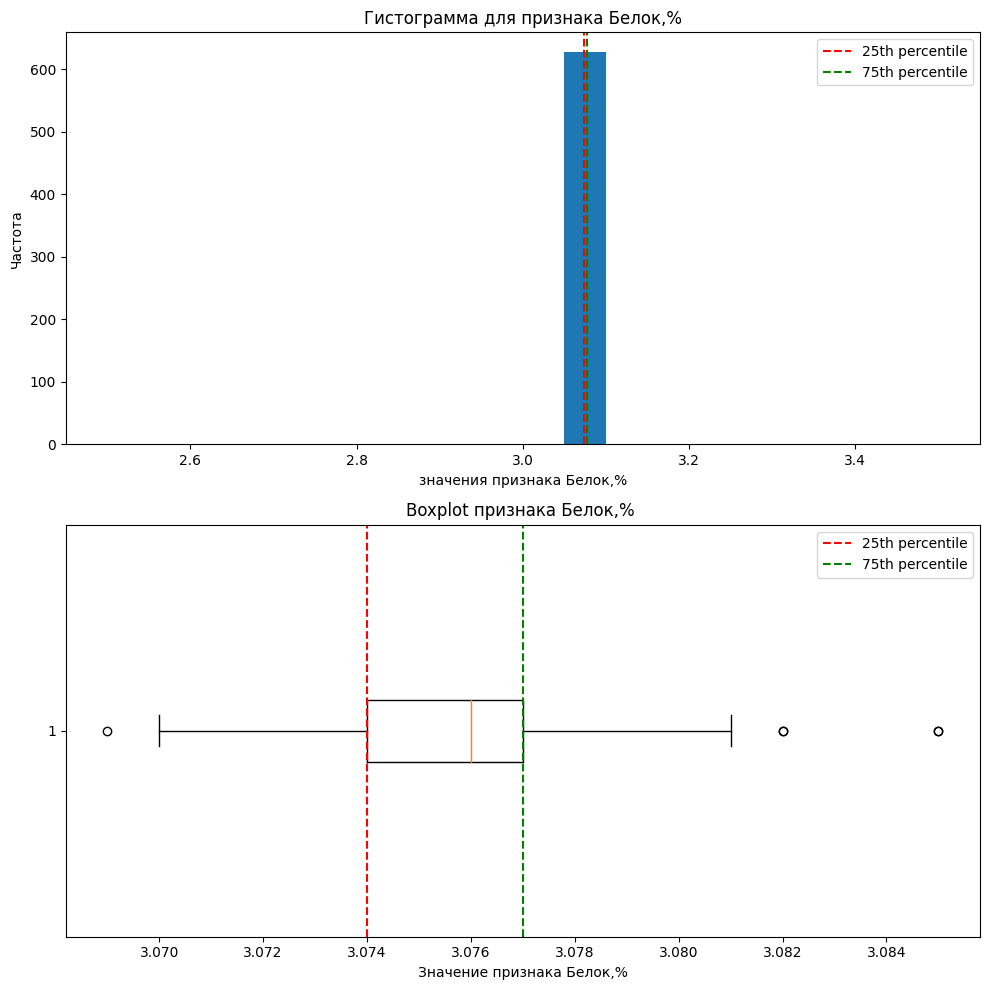

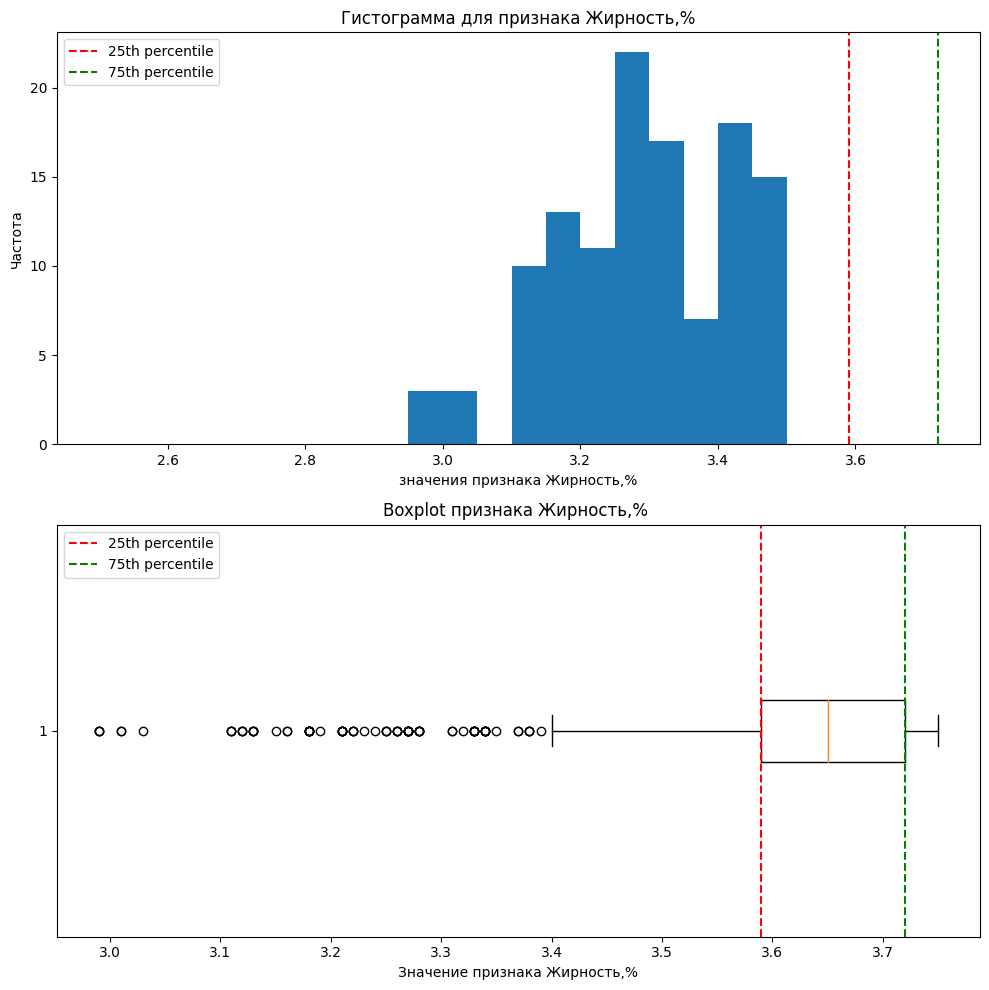

In [151]:


dataset_name= 'Ферма'
for col in discrete_columns:

    df_for_plot= ferma_df[col]

    # Рассчитываем квартили
    q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
    min_val = int(q25- 1.5*(q75-q25))
    max_val= int(q75 +  1.5*(q75-q25))

    # Создаем новый график
    plt.figure(figsize=(10, 10))

    # Строим гистограмму
    plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
    plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
    plt.title(f'Гистограмма для признака {dict_names[col]}')
    plt.xlabel(f'значения признака {dict_names[col]}')
    plt.ylabel(f'Частота')


    # Помечаем квартили на гистограмме
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()

    # Строим график boxplot
    plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
    plt.boxplot(df_for_plot, vert=False)
    plt.title(f'Boxplot признака {dict_names[col]} ')
    plt.xlabel(f'Значение признака {dict_names[col]}')

    # Помечаем квартили на boxplot
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()


    # Показываем графики
    plt.tight_layout()  # Для автоматического выравнивания графиков
    plt.show()


        

Посмотрим на гистограммы поближе

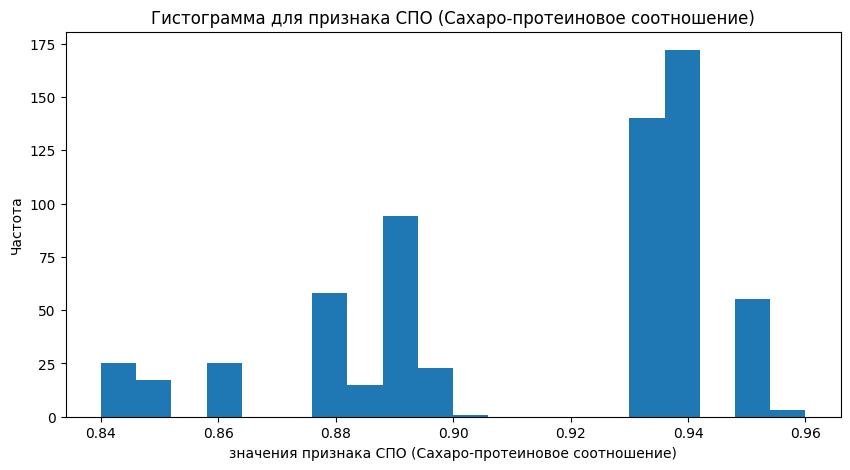

In [152]:
dataset_name= 'Ферма'
col = 'sugar_protein_ratio'
df_for_plot= ferma_df[col]

# Создаем новый график
plt.figure(figsize=(10, 5))

# Строим гистограмму
plt.hist(df_for_plot, bins=20)
plt.title(f'Гистограмма для признака {dict_names[col]}')
plt.xlabel(f'значения признака {dict_names[col]}')
plt.ylabel(f'Частота')
plt.show()

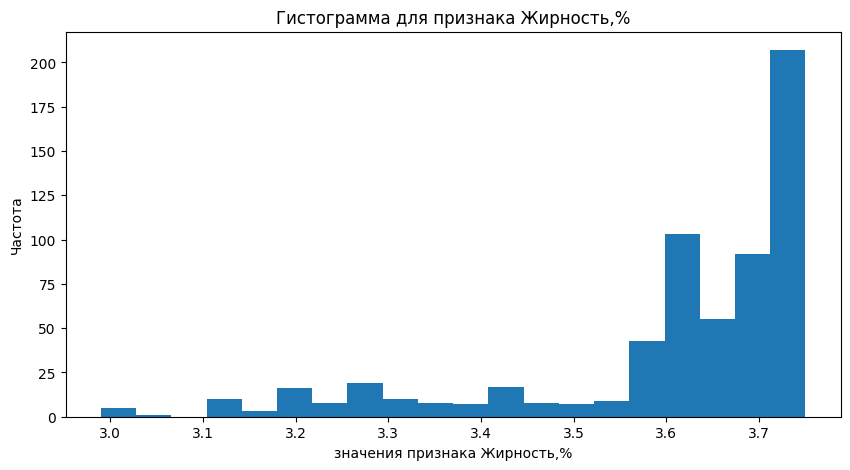

In [153]:
dataset_name= 'Ферма'
col = 'milk_fat_percent'
df_for_plot= ferma_df[col]

# Создаем новый график
plt.figure(figsize=(10, 5))

# Строим гистограмму
plt.hist(df_for_plot, bins=20)
plt.title(f'Гистограмма для признака {dict_names[col]}')
plt.xlabel(f'значения признака {dict_names[col]}')
plt.ylabel(f'Частота')
plt.show()

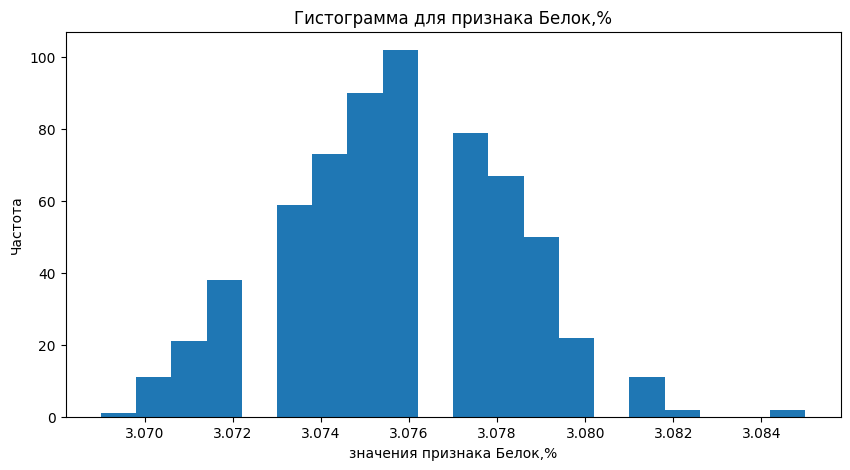

In [154]:
dataset_name= 'Ферма'
col = 'percent_protein_in_milk'
df_for_plot= ferma_df[col]

# Создаем новый график
plt.figure(figsize=(10, 5))

# Строим гистограмму
plt.hist(df_for_plot, bins=20)
plt.title(f'Гистограмма для признака {dict_names[col]}')
plt.xlabel(f'значения признака {dict_names[col]}')
plt.ylabel(f'Частота')
plt.show()

**Выводы по графикам категориальных признаков:**


1) Порода коров: 
    - на ферме преобладают коровы породы Айдиал
    - на продажу предлагается 8 коров Соверин и 8 коров Айдиал

2) Тип пастбища:
    - коровы на ферме в основном пасутся на холмистых пастбищах
    - коровы на продажу: 8 на холмистых, 8 - на равнивнных 

3) Порода быков:
    - коровы на ферме имеют примерно одинаковое соотношение отцов-соверинов и отцов-айдиалов
    - коровы на продажу: у 10 отцы - соверины, у 6 - айдиалы

4) Вкус молока:
    - у коров на ферме в основном вкусное молоко (примерно 60/40 в пользу вкусного молока)
    - у коров на продажу: <font color='red'>предстоит предсказать</font> 

5) Возраст коров:
    - на ферме подавляющее большинство коров старше 2 лет (примерно 85/15)
    - на продажу 11 коров старше 2 лет, и 5 - младше

6) Сахаро-протеиновое соотношение в корме коровы:
    - на ферме чаще всего встречаются значения 0.94, 0.93 , 0.89, 0.88. Остальные намного реже. 
    - у коров на продажу этот показатель отсутствует

7) Процент белка в молоке:
    - у коров на ферме чаще всего от 3.072 до 3.079. Самое частое значение - 3.076 (более, чем у 100 коров)
    - у коров на продажу: 20% с хорошим показателем белка (3 коровы - 3.079), остальные - от 3.05 до 3.08

8) Жирность молока:
    - у коров на ферме: около 40% выдают жирность 3.71-3.73%, меньше 30% коров - около 3.6%, жирность ниже 3.4 - выбросы
    - у коров на продажу разнообразнее: 3 коровы с высоким показателем 3.73, 3 коровы с низким - 3.4. Остальные дают молоко с жирностью в этом диапазоне

9) Имя быка:
    - у коров на ферме самые частые отцы - Барин и Буйный (75% коров), у остальных - Соловчик и Геркулес (25%)
    - у коров на продажу - самый частый отец Буйный (7 коров), потом Геркулес (5 коров), у 4 - Барин и Соловчик


### Шаг 4. Корреляционный анализ признаков в датасете 

In [155]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old,bull_name
0,1,5863,14.2,1743,0.890,0,0,0,3.58,3.076,1,1,Буйный
1,2,5529,12.8,2138,0.890,0,0,1,3.54,3.079,1,0,Соловчик
2,3,5810,14.0,1854,0.885,1,1,1,3.59,3.074,0,1,Барин
3,4,5895,12.4,2012,0.885,1,1,0,3.40,3.075,0,1,Буйный
4,5,5302,12.8,1675,0.885,0,0,1,3.73,3.073,1,0,Барин


In [156]:
numeric_columns

['milk_yield_kg', 'energy_feed_unity', 'crude_protein_g']

In [157]:
discrete_columns

['sugar_protein_ratio', 'percent_protein_in_milk', 'milk_fat_percent']

#### 4.1 Коэффицициенты корреляции Спирмена для числовых значений

In [158]:
ferma_df[numeric_columns + discrete_columns].corr(method='spearman')

,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,percent_protein_in_milk,milk_fat_percent
milk_yield_kg,1.000000,0.765144,0.437543,0.787904,-0.005701,0.688506
energy_feed_unity,0.765144,1.000000,0.384747,0.741962,-0.013321,0.686973
crude_protein_g,0.437543,0.384747,1.000000,0.485890,0.229051,0.392822
sugar_protein_ratio,0.787904,0.741962,0.485890,1.000000,0.109924,0.701044
percent_protein_in_milk,-0.005701,-0.013321,0.229051,0.109924,1.000000,0.043125
milk_fat_percent,0.688506,0.686973,0.392822,0.701044,0.043125,1.000000


Построим тепловую карту корреляции числовых признаков Фермы

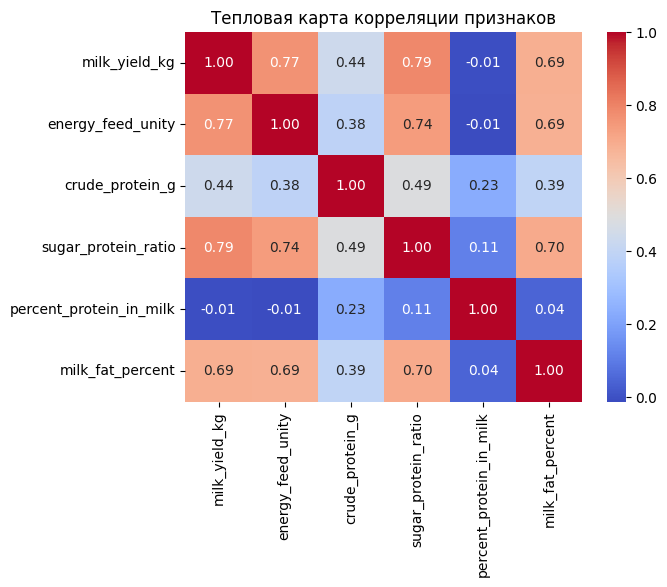

In [159]:
ax = plt.axes()
sns.heatmap(ferma_df[numeric_columns + discrete_columns].corr(method='spearman'), 
            annot=True, fmt='.2f', ax=ax, cmap='coolwarm' )

ax.set_title('Тепловая карта корреляции признаков')
plt.show()



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


    

   

У нас же не все  признаки имеют нормальное распределение, а  Пирсона (по умолчанию в .corr  считается именно он) мы используем в случае нормальности распределения данных, ведь этот коэффициент чувствителен к отклонениям от нормальности (и к выбросам кстати). В случаи ненормальности в распредлении используем Спирмена       



<div class="alert alert-warning">


Совет: 


- можно поменять политру для удобства восприятия, через добавление cmap='coolwarm' ('bwr', 'seismic'), тогда чем ближе корреляция к 1 тем красней, чем ближе к -1 тем "синей" , ну и чем меньше связи, чем ближе к 0, тем нейтальней цвет


<div class="alert alert-info"> <b>Комментарии студента:</b> Поправил</div>

Вывод по корреляции числовых признаков: 
1) Удой неплохо коррелирует со всеми признаками, кроме содержания белка в молоке

2) Процент содержания белка: 
    - немного коррелирует с содержанием белка в корме 
    - но больше ни с чем

3) Жирность молока:
    - неплохо коррелирует с ЭКЕ и сахаро-протеиновым соотношением
    - похуже - с содержанием белка в корме
    - и никак - с содержанием белка в молоке

это нормально - очень важно, чем ты кормишь корову

4) ЭКЕ:
    - неплохо коррелирует с сахаро-белковым соотношением и жирностью молока, 
    - чуть хуже с содержанием протеина в корме 
    - и никак - с содержанием белка в молоке

5) показатели по корму в целом коррелируют между собой 



#### 4.2 Диаграммы рассеяния для признака Удой и всех количественных признаков с учётом значения категориальных признаков

In [160]:
ferma_df.columns

Index(['id', 'milk_yield_kg', 'energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_tasty', 'is_old', 'bull_name'],
      dtype='object')

In [161]:
numeric_columns+discrete_columns

['milk_yield_kg',
 'energy_feed_unity',
 'crude_protein_g',
 'sugar_protein_ratio',
 'percent_protein_in_milk',
 'milk_fat_percent']

In [162]:
categorical_columns

['cow_is_sovering',
 'pasture_is_hill',
 'bull_is_sovering',
 'is_tasty',
 'is_old',
 'bull_name']

In [163]:
dict_names

{'milk_yield_kg': 'Удой, кг',
 'energy_feed_unity': 'ЭКЕ (Энергетическая кормовая единица)',
 'crude_protein_g': 'Сырой протеин, г',
 'sugar_protein_ratio': 'СПО (Сахаро-протеиновое соотношение)',
 'cow_is_sovering': 'корова породы соверин',
 'bull_is_sovering': 'бык породы соверин',
 'pasture_is_hill': 'пастбище холмистое',
 'milk_fat_percent': 'Жирность,%',
 'percent_protein_in_milk': 'Белок,%',
 'is_tasty': 'молоко вкусное',
 'is_old': 'корова старше двух лет',
 'bull_name': 'имя быка'}

Строим графики рассеяния Удоя относительно численных признаков с учетом разных значений категориальных признаков

Создадим функцию построения графиков

In [164]:
def plot_scatter_for_df(some_df,num_feat, cat_feat, target_feature='milk_yield_kg'):

    # забираем истинные имена признаков
    num_feature_name = dict_names[num_feat]
    cat_feat_name = dict_names[cat_feat]

    # Создаем scatter-plot с линиями тренда для каждой группы точек
    fig = px.scatter(some_df, x=num_feat, y=target_feature, color=cat_feat,
                    color_discrete_map={0: 'blue', 1: 'yellow'},
                    title= f'График рассеяния Удоя по {num_feature_name} с учетом признака "{cat_feat_name}"',
                    labels= {num_feat: num_feature_name, target_feature: 'Удой, кг'},
                    )

    # Фильтруем данные для каждой группы точек
    data_yellow = some_df[some_df[cat_feat] == 1]
    data_blue = some_df[some_df[cat_feat] == 0]

    # Добавляем линию тренда для красных точек
    fig.add_trace(px.scatter(data_yellow, 
                            x=num_feat, 
                            y=target_feature, 
                            trendline='ols',
                            trendline_color_override= 'orange',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для синих точек
    fig.add_trace(px.scatter(data_blue, 
                            x=num_feat, 
                            y=target_feature, 
                            trendline='ols',
                            trendline_color_override= 'blue',
                            color_continuous_scale=False).data[1])


    # Добавляем описание легенды
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='yellow'), 
                             showlegend=True, name=f'{cat_feat_name} = да'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='blue'), 
                             showlegend=True, name=f'{cat_feat_name} = нет'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='orange'), 
                             showlegend=True, name=f'линия тренда для {cat_feat_name}=да'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='blue'), 
                             showlegend=True, name=f'линия тренда для {cat_feat_name}=нет'))

    # Перемещаем легенду над графиком
    fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

    # Показываем график
    fig.show()


In [165]:
# напишем отдельную функцию для признака "Имя быка" - у него 4 значения

def plot_scatter_for_df_2(some_df,num_feat, cat_feat, target_feature='milk_yield_kg'):

    # забираем истинные имена признаков
    num_feature_name = dict_names[num_feat]
    cat_feat_name = dict_names[cat_feat]    

    # Создаем scatter-plot с линиями тренда для каждой группы точек
    fig = px.scatter(some_df, x=num_feat, y=target_feature, color=cat_feat,
                    title= f'График рассеяния Удоя по {num_feature_name} с учетом признака {cat_feat_name}',
                    labels= {'num_feat': num_feature_name,'milk_yield_kg': 'Удой, кг'},
                    )

    # Фильтруем данные для каждой группы точек
    data_red = ferma_df[ferma_df['bull_name'] == 'Соловчик']
    data_blue = ferma_df[ferma_df['bull_name'] == 'Буйный']
    data_green = ferma_df[ferma_df['bull_name'] == 'Барин']
    data_violet = ferma_df[ferma_df['bull_name'] == 'Геркулес']


    # Добавляем линию тренда для красных точек
    fig.add_trace(px.scatter(data_red, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'red',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для синих точек
    fig.add_trace(px.scatter(data_blue, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'blue',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для зеленых точек
    fig.add_trace(px.scatter(data_green, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'green',
                            #color_continuous_scale=False
                            ).data[1])

    # Добавляем линию тренда для фиолетовых точек
    fig.add_trace(px.scatter(data_violet, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'violet',
                            #color_continuous_scale=False
                            ).data[1])

    # Показываем график
    fig.show()


Запускаем цикл построения графиков

In [166]:
for col_1 in numeric_columns+discrete_columns:  # цикл по числовым признакам
    if col_1 == 'milk_yield_kg': continue       # диаграмма рассеяния бессмысленна для зависимости удоя от удоя
    
    for col_2 in categorical_columns:           # цикл по категориальным признакам
        if col_2=='bull_name':
            plot_scatter_for_df_2(some_df= ferma_df, 
                            num_feat=col_1, 
                            cat_feat=col_2,
                            target_feature='milk_yield_kg')

        else: 
            plot_scatter_for_df(some_df= ferma_df, 
                            num_feat=col_1, 
                            cat_feat=col_2,
                            target_feature='milk_yield_kg')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:





- здорово что построен    scatter plot в разбивке по категориальным признакам 

- здорово что добавил линии тренда, но почему бы не  посчитать насколько хорошо эти прямые описывают точки

<div class="alert alert-warning">


Совет: 



- как можно упростить построение графиков типа scatter?  Можно воспользоваться [sns.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).  Он буквально двумя строчками строит scater_plot с разбивкой по категориальным признакам (hue - указываем категориальный признак по которому мы хотим сделать дополнителное разбиение,     facor - список количественных признаков, targ - целевая количественная переменная, cat - Список категориальных признаков)
    
    
            for category in cat:
                g = sns.PairGrid(df, hue = category, x_vars=factor, y_vars=targ)





<div class="alert alert-info"> <b>Комментарии студента:</b> я говорю: довольно сложно искать информацию по построению графиков, собранную в одном месте. Спасибо большое за совет, буду пользоваться!</div>

**Вывод по корреляции удоя с числовыми признаками с учетом категориальных признаков:**

1) ЭКЕ корма коровы
    - линейная корреляция  <font color='red'>вне зависимости</font> от породы коровы, типа пастбища, вкусности молока, имени быка
    - линейная корреляция с учетом породы быка, однако корреляция немного выше для коров, чьи отцы - породы Айдиал
    - линейная корреляция для коров старше 2 лет, однако очень низкая для коров младше 2 лет (молодые буренки доятся хорошо и без высокого значения корма)

2) Сырой протеин в корме коровы
    - линейная корреляция  <font color='red'>вне зависимости</font> от породы коровы, типа пастбища, породы быка, вкусности молока, имени быка
    - линейная корреляция для коров старше 2 лет, однако очень низкая для коров младше 2 лет (молодые буренки доятся хорошо и без высокого значения корма)

3) Сахаро-протеиновое соотношение в корме коровы: данные дискретны, сложно назвать такое соотношение линейным, однако зависимости от категориальных признаков аналогичны - для коров младше 2 лет влиняния на удой нет

4) Содержание белка в молоке - графики подтверждают отсутствие корреляции

5) Жирность молока - типы корреляции аналогичны корреляции удоя с ЭКЕ по различным категориальным признакам

#### 4.3 Общие выводы по корреляции


1) В основном наблюдается линейная корреляция между Удоем (целевой показатель) и численными признаками. Иключение: содержание белка в молоке (практически полное отсутствие корреляции)

2) Величина корреляции практически не зависит от категориальных показателей, однако очень низкая для молодых коров - они доятся одинаково вне зависимости от составляющих корма

3) Возможно, есть нелинейная связь между Удоем и содержанием белка в молоке, хотя вряд ли: белок в молоке коррелирует с белком в корме. Вводить дополнительные признаки не требуется 

4) Показатели по корму (ЭКЕ, содержание протеина, сахаро-протеиновое соотношение) коррелируют между собой, особенно ЭКЕ и СПС (значение к-та Пирсона = 0.75). Однако, мультиколлинеарными считаются признаки с корреляцией от 0.9. Поэтому удалять эти признаки не будем

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:




- сделаны выводы относительно нелинейных связей между таргетом "удой" и некоторыми количественными признаками. на основе этой информации мы и сделаем ниже преобразования наших признаков, учитывая выявленные особенности



- хорошо заметил по поводу того что "сколько молодых коров не корми ничего не меняется" 



- есть проверка на мультколлинеарность


<div class="alert alert-warning">


Совет: 




- чтобы убедиться что соотношение между удоем и ЭКО в квадрате лучше описывается прямой, можно построить scatter plot для  эке в квадрате и наложить прямую регрессию с вычислением r2 



### Шаг 5. Линейная Регрессия 

#### 5.1 Первая модель до настройки

##### 5.1.1 Выбор признаков для прогнозирования

Целевой признак - Удой (молока в кг)

Входные признаки для прогнозирования:
1) Показатели корма
    - ЭКЕ (energy_feed_unity)
    - содержание протеина (crude_protein_g)
    - СПО (sugar_protein_ratio)
2) Порода
    - коровы (cow_is_sovering)
    - быка (bull_is_sovering)
3) Отец коровы
    - имя быка (bull_name)

4) Тип пастбища (pasture_is_hill)
5) Возраст коровы (is_old)


Показатели вкуса молока, содержания белка и жирность использовать не будем - они никак не влияют на величину удоя

In [167]:
y=ferma_df.milk_yield_kg
X= ferma_df[['energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'is_old', 'bull_name']]


##### 5.1.2 Разобьем данные на тренировочную и тестовую выборки

In [168]:
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

##### 5.1.3 Кодируем категориальные признаки

У нас остался только один некодированный признак - имя быка

In [169]:

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(sparse=False, drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[['bull_name']])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

- Вылетает ошибка     
    
    AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names_out'

    
Тут тебе нужно проследить за версиями библиотек (Попробуй добавить !pip install -U scikit-learn)    
    
    

- Вот тут мы подходим к тому что не нужно было предобрабатывать данные.  Вот тут бы мы все наши категориальные данные могли бы засунуть в OneHotEncoder, без предварительного ручного кодирования. Предлагаю использовать однотипный подход ко всем категориальным признакам

In [170]:
!pip3 install -U scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


<div class="alert alert-info"> <b>Комментарии студента:</b> сделал - ошибка не вылетает</div>

In [171]:
X_test_ohe.head()

,bull_name_Буйный,bull_name_Геркулес,bull_name_Соловчик
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [172]:
X_train_ohe.head()

,bull_name_Буйный,bull_name_Геркулес,bull_name_Соловчик
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


##### 5.1.4 Кодируем количественные признаки

In [173]:
num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio']

# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем масштабированные данные с именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [174]:
X_train_scaled.head()

,energy_feed_unity,crude_protein_g,sugar_protein_ratio
0,1.502378,1.079523,0.837130
1,-1.557270,-0.196920,-0.703660
2,0.125537,-1.386085,-1.011818
3,-0.103937,0.752230,0.837130
4,-1.098323,0.828598,-0.703660


In [175]:
X_test_scaled.head()

,energy_feed_unity,crude_protein_g,sugar_protein_ratio
0,-0.486393,-0.813322,-1.011818
1,1.425887,0.026730,0.837130
2,-0.486393,-0.682405,-1.628134
3,-0.945340,-1.058792,-1.011818
4,0.584484,-1.413360,-0.703660


##### 5.1.5 сшиваем все вместе

In [176]:
X_train.head()

,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bull_name
508,16.5,2123,0.94,1,1,1,1,Соловчик
383,12.5,1889,0.89,1,1,1,0,Барин
587,14.7,1671,0.88,0,0,0,1,Буйный
197,14.4,2063,0.94,0,1,0,1,Буйный
328,13.1,2077,0.89,0,0,0,1,Геркулес


In [177]:
X_train.columns

Index(['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio',
       'cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'bull_name'],
      dtype='object')

In [178]:
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)

X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)

In [179]:
X_train_non_encoded.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old
0,1,1,1,1
1,1,1,1,0
2,0,0,0,1
3,0,1,0,1
4,0,0,0,1


In [180]:
X_test_non_encoded.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old
0,0,1,0,1
1,1,1,1,1
2,1,1,1,0
3,0,0,1,1
4,0,1,1,1


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Очень громоздкая подготовка данных получилась


<div class="alert alert-info"> <b>Комментарии студента:</b> согласен, на следующих проектах буду упрощать. тоже подумал, что многовато кода получается для несложных операций</div>

сшиваем воедино

In [181]:
X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

In [182]:
X_train.shape

(471, 10)

In [183]:
X_test.shape

(157, 10)

In [184]:
X_train.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,"(bull_name_Буйный,)","(bull_name_Геркулес,)","(bull_name_Соловчик,)",energy_feed_unity,crude_protein_g,sugar_protein_ratio
0,1,1,1,1,0.0,0.0,1.0,1.502378,1.079523,0.837130
1,1,1,1,0,0.0,0.0,0.0,-1.557270,-0.196920,-0.703660
2,0,0,0,1,1.0,0.0,0.0,0.125537,-1.386085,-1.011818
3,0,1,0,1,1.0,0.0,0.0,-0.103937,0.752230,0.837130
4,0,0,0,1,0.0,1.0,0.0,-1.098323,0.828598,-0.703660


In [185]:
X_train.columns

Index([      'cow_is_sovering',       'pasture_is_hill',
            'bull_is_sovering',                'is_old',
         ('bull_name_Буйный',), ('bull_name_Геркулес',),
       ('bull_name_Соловчик',),     'energy_feed_unity',
             'crude_protein_g',   'sugar_protein_ratio'],
      dtype='object')

In [186]:
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

In [187]:
X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)

In [188]:
X_train.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bname_is_bui,bname_is_herc,bname_is_sol,energy_feed_unity,crude_protein_g,sugar_protein_ratio
0,1,1,1,1,0.0,0.0,1.0,1.502378,1.079523,0.837130
1,1,1,1,0,0.0,0.0,0.0,-1.557270,-0.196920,-0.703660
2,0,0,0,1,1.0,0.0,0.0,0.125537,-1.386085,-1.011818
3,0,1,0,1,1.0,0.0,0.0,-0.103937,0.752230,0.837130
4,0,0,0,1,0.0,1.0,0.0,-1.098323,0.828598,-0.703660


In [189]:
X_test.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bname_is_bui,bname_is_herc,bname_is_sol,energy_feed_unity,crude_protein_g,sugar_protein_ratio
0,0,1,0,1,0.0,1.0,0.0,-0.486393,-0.813322,-1.011818
1,1,1,1,1,0.0,0.0,1.0,1.425887,0.026730,0.837130
2,1,1,1,0,0.0,0.0,0.0,-0.486393,-0.682405,-1.628134
3,0,0,1,1,0.0,0.0,0.0,-0.945340,-1.058792,-1.011818
4,0,1,1,1,0.0,0.0,0.0,0.584484,-1.413360,-0.703660


In [190]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [191]:
y_train

0      6498
1      5268
2      5610
3      6343
4      5833
       ... 
466    5718
467    6392
468    5971
469    5858
470    5591
Name: milk_yield_kg, Length: 471, dtype: int64

In [192]:
y_test

0      5980
1      6512
2      5392
3      5604
4      5667
       ... 
152    6686
153    6967
154    6248
155    5640
156    5372
Name: milk_yield_kg, Length: 157, dtype: int64

Построим гистограмму и boxplot для количественных данных - чтобу убедиться в корректности масштабирования

In [193]:
X_train.columns

Index(['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'bname_is_bui', 'bname_is_herc', 'bname_is_sol', 'energy_feed_unity',
       'crude_protein_g', 'sugar_protein_ratio'],
      dtype='object')

In [194]:
num_col_names =['energy_feed_unity','crude_protein_g', 'sugar_protein_ratio']

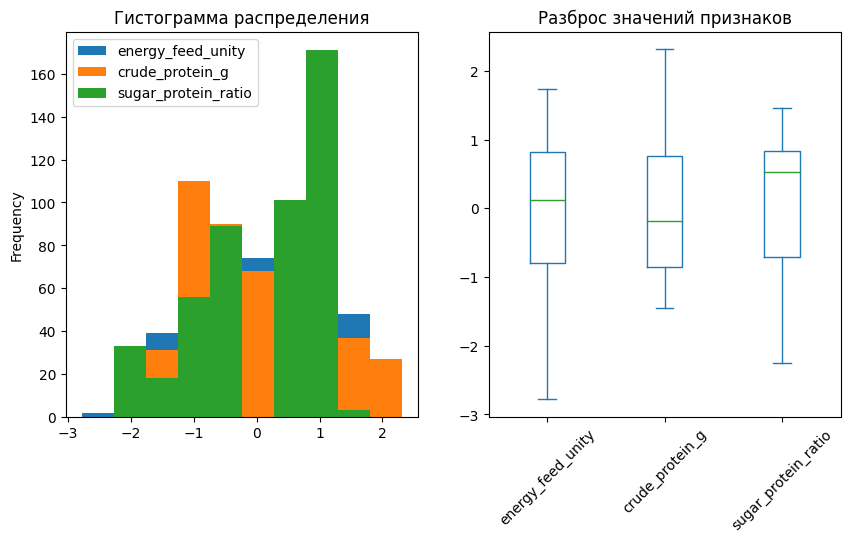

In [195]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [196]:
X_train[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

,mean,std
energy_feed_unity,0.0,1.0011
crude_protein_g,-0.0,1.0011
sugar_protein_ratio,0.0,1.0011


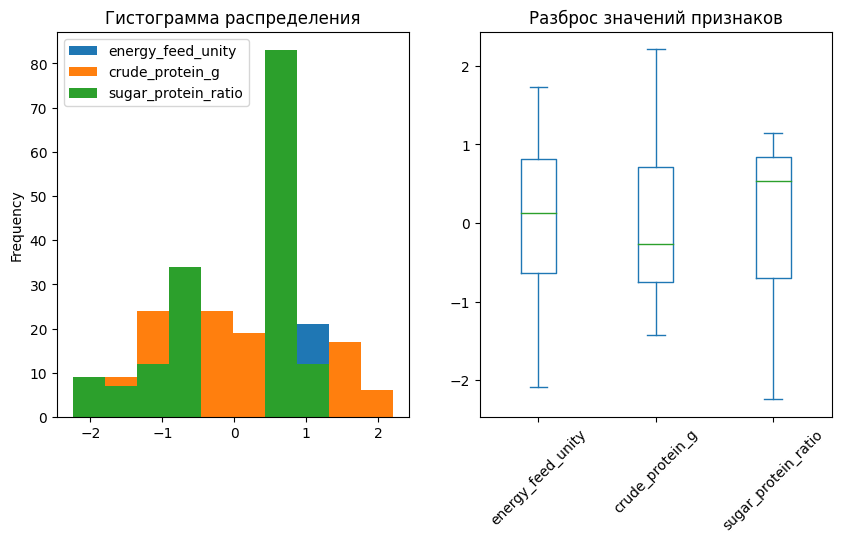

In [197]:
# постройте графики по количественным признакам тестового датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_test[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_test[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [198]:
X_test[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

,mean,std
energy_feed_unity,0.0393,0.9822
crude_protein_g,-0.0292,0.9889
sugar_protein_ratio,0.0314,0.9709


Значения среднего приведены к нулю, значения стандартного отклонения - к единице

Данные готовы.

##### 5.1.5 Обучаем первую модель линейной регрессии

In [199]:
# инициализируйте модель линейной регрессии
model_lr  = LinearRegression()

# обучите модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions = model_lr.predict(X_test)

# посчитайте среднюю абсолютную ошибку на тестовых данных и выведите её на экран
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')

MAE = 156




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

 Совет:

    
Чтобы сделать код компактнее можно  оформить дополнительную функцию. Как видишь в этом проекте мы не делаем перебора гиперпараметров, и не используем разные модели, так почему бы не создать функцию, которая будет принимать разный набор признаков, а дальше делать одно и то же (сплит, шкалирование + OHE, обучение модели, прогноз модели). Вместо того чтобы три раза писать простыню из кода, мы напишем простыню один раз, а затем три раза применим функцию одной строкой (кстати советую в return кроме модели добавить вывод Scaler и Encoder, ведь они нам понадобятся для того чтобы сделать transform на данных из cow_buy) . В проектах где будет перебор гиперпараметров и мы будем использовать разные модели, в такой функции необходимости не будет, но в этом проекте, я думаю мы здорово улучшим восприятие кода
    
И парочку cоветов по оформлению функций:    
    
- Для таких простых функций острой необходимости нет, код говорит сам за себя, но если хочешь попрактиковаться, можешь включить строку документации [docstring](https://dzen.ru/a/Yw02qy-7BGdhFhN3?utm_referer=yandex.ru).  Можно оставить описание того что делает эта функция, а затем попробовать вызвать что та напишешь с помощью
    
    
    print(my_function.__doc__)
    
или    
    
    help(my_function)


- Код создания функции обычно оставляет под импортами, так их легче контролировать



<div class="alert alert-info"> <b>Комментарии студента:</b> принято, изучу))</div>

Считаем коэффициент детерминации R2

In [200]:
r2 = r2_score(y_test, predictions) 
r2

0.8029336092311704

Итого видим, что:
- средняя ошибка модели по модулю составляет 156кг удоя в год
- точность модели - 80% (модель ошибается 1 раз из 5 наблюдений)

Посчитаем остатки и проанализируем их

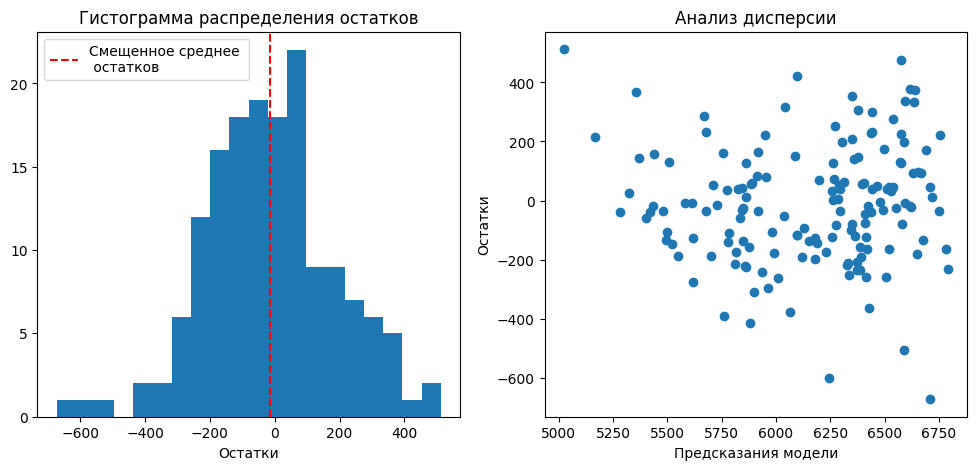

In [201]:
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(residuals, bins=20)
axes[0].axvline(residuals.mean(), color='r', linestyle='--', label='Смещенное среднее \n остатков')
axes[0].legend(loc='upper left')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Судя по графикам, модель завышает значения удоя, тем самым вводя в заблуждение.

Причем, дисперсия остатков не выглядит постоянной.




    
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:

    
    
- есть графический анализ остатков и вывод о недостаточной гомоскедастичности на месте     
     
    
    

Вывод: модель требует доработки
- необходимо добавить в модель новые признаки
- нужно как-то трансформировать данные, чтобы изменить взаимосвязь входных признаков с целевым.

##### 5.1.6 Настройка модели

Посмотрев еще раз на диаграммы рассеяния в пункте 4.2 вспомним, что связь между Удоем и Сахаро-протеиновым соотношением (СПО) не является линейным

In [202]:
plot_scatter_for_df(some_df=ferma_df,
                    num_feat='sugar_protein_ratio', 
                    cat_feat='pasture_is_hill',
                    target_feature='milk_yield_kg')

Данные можно разделить на два кластера по СПО:
- СПО менее 0.91
- СПО более 0.91

In [203]:
X.head()

,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bull_name
0,14.2,1743,0.890,0,0,0,1,Буйный
1,12.8,2138,0.890,0,0,1,0,Соловчик
2,14.0,1854,0.885,1,1,1,1,Барин
3,12.4,2012,0.885,1,1,0,1,Буйный
4,12.8,1675,0.885,0,0,1,0,Барин


Превратим СПО в бинарный категориальный признак для выборки

In [204]:
X_new = X.copy(deep=True)

In [205]:
X_new['spr_is_less_091']= X_new.sugar_protein_ratio.apply(lambda x: 1 if x<0.91 else 0)

In [206]:
X_new.drop('sugar_protein_ratio', axis=1, inplace=True)

In [207]:
X_new.head()

,energy_feed_unity,crude_protein_g,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bull_name,spr_is_less_091
0,14.2,1743,0,0,0,1,Буйный,1
1,12.8,2138,0,0,1,0,Соловчик,1
2,14.0,1854,1,1,1,1,Барин,1
3,12.4,2012,1,1,0,1,Буйный,1
4,12.8,1675,0,0,1,0,Барин,1


In [208]:
X_new.shape

(628, 8)

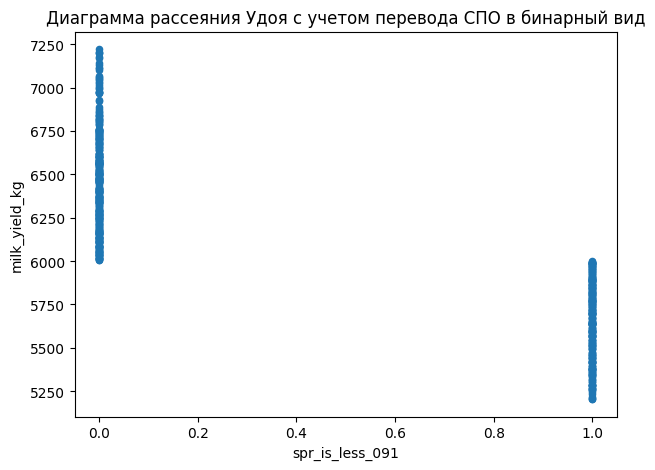

In [209]:
pd.merge(X_new, y.to_frame(), left_index=True, right_index=True)\
    .plot(kind= "scatter", x='spr_is_less_091', y='milk_yield_kg', figsize=(7,5))

plt.title('Диаграмма рассеяния Удоя с учетом перевода СПО в бинарный вид')
plt.show()

Также, диаграммы рассеяния в пункте 4.2 говорят, что связь между Удоем и Энергетической кормовой единицей (ЭКЕ) тоже не является линейным

In [210]:
plot_scatter_for_df(some_df=ferma_df,
                    num_feat='energy_feed_unity', 
                    cat_feat='pasture_is_hill',
                    target_feature='milk_yield_kg')

Возведем значение ЭКЕ в квадрат для устранения нелинейности

In [211]:
X_new['sq_efu'] = X_new.energy_feed_unity **2

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Данные подготовлены


In [212]:
X_new.drop('energy_feed_unity', axis=1, inplace=True)

In [213]:
X_new.head()

,crude_protein_g,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bull_name,spr_is_less_091,sq_efu
0,1743,0,0,0,1,Буйный,1,201.64
1,2138,0,0,1,0,Соловчик,1,163.84
2,1854,1,1,1,1,Барин,1,196.00
3,2012,1,1,0,1,Буйный,1,153.76
4,1675,0,0,1,0,Барин,1,163.84


In [214]:
X_new.shape

(628, 8)

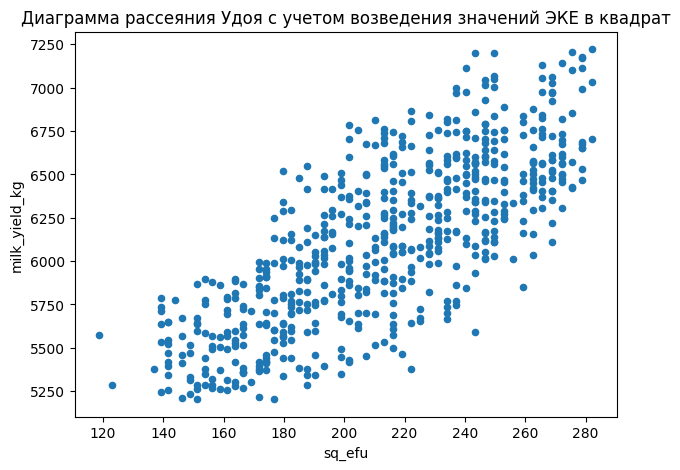

In [215]:
pd.merge(X_new, y.to_frame(), left_index=True, right_index=True)\
    .plot(kind= "scatter", x='sq_efu', y='milk_yield_kg', figsize=(7,5))

plt.title('Диаграмма рассеяния Удоя с учетом возведения значений ЭКЕ в квадрат')
plt.show()

#### 5.2 Вторая модель после приведения СПО в бинарный вид и возведения ЭКЕ в квадрат

##### 5.2.1 Снова подготавливаем данные для модели

In [216]:
# разбиваем данные на тренировочную и тестовую выборки

RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_new, 
    y, 
    random_state=RANDOM_STATE
)

### кодируем категориальный признак

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(sparse=False, drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[['bull_name']])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

### кодируем количественные признаки

num_col_names = ['sq_efu', 'crude_protein_g']

# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем масштабированные данные с именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


### оставляем данные без кодирования

X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)


In [217]:
X_new.columns

Index(['crude_protein_g', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'is_old', 'bull_name', 'spr_is_less_091', 'sq_efu'],
      dtype='object')

In [218]:
X_train.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,spr_is_less_091,bname_is_bui,bname_is_herc,bname_is_sol,sq_efu,crude_protein_g
0,1,1,1,1,0,0.0,0.0,1.0,1.577968,1.079523
1,1,1,1,0,1,0.0,0.0,0.0,-1.511438,-0.196920
2,0,0,0,1,1,1.0,0.0,0.0,0.082269,-1.386085
3,0,1,0,1,0,1.0,0.0,0.0,-0.150235,0.752230
4,0,0,0,1,1,0.0,1.0,0.0,-1.102358,0.828598


In [219]:
X_test.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,spr_is_less_091,bname_is_bui,bname_is_herc,bname_is_sol,sq_efu,crude_protein_g
0,0,1,0,1,1,0.0,1.0,0.0,-0.527089,-0.813322
1,1,1,1,1,0,0.0,0.0,1.0,1.490346,0.026730
2,1,1,1,0,1,0.0,0.0,0.0,-0.527089,-0.682405
3,0,0,1,1,1,0.0,0.0,0.0,-0.961737,-1.058792
4,0,1,1,1,1,0.0,0.0,0.0,0.561660,-1.413360


In [220]:
X_train.shape

(471, 10)

In [221]:
X_test.shape

(157, 10)

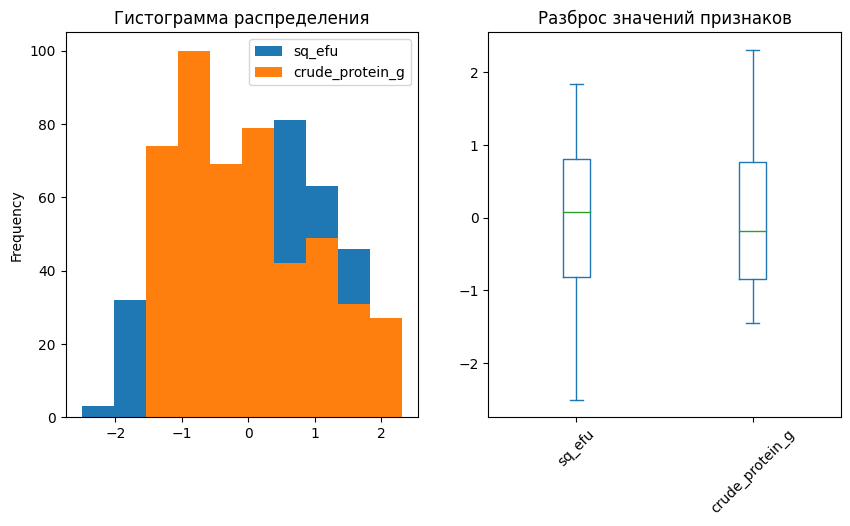

In [222]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [223]:
X_train[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

,mean,std
sq_efu,0.0,1.0011
crude_protein_g,-0.0,1.0011


##### 5.2.2 Обучаем вторую модель

In [224]:
# инициализируйте модель линейной регрессии
model_lr_2  = LinearRegression()

# обучите модель на тренировочных данных
model_lr_2.fit(X_train, y_train)

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions_2 = model_lr_2.predict(X_test)

# посчитайте среднюю абсолютную ошибку на тестовых данных и выведите её на экран
mae_2 = mean_absolute_error(y_test, predictions_2)
print(f'MAE = {mae_2:.0f}')

MAE = 146


Считаем коэффициент детерминации R2

In [225]:

r2_2 = r2_score(y_test, predictions_2) 
r2_2


0.8247542745210407

Итого видим, что:
- средняя ошибка модели по модулю уменьшилась на 10 кг молока в год
- точность модели - выросла на 2%


Посчитаем остатки и проанализируем их

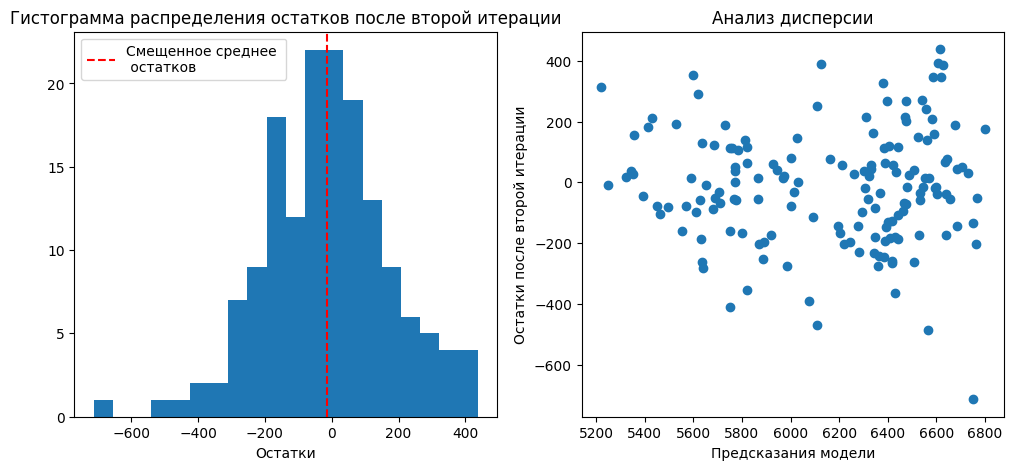

In [226]:
residuals_2 = y_test - predictions_2

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(residuals_2, bins=20)
axes[0].axvline(residuals_2.mean(), color='r', linestyle='--', label='Смещенное среднее \n остатков')
axes[0].legend(loc='upper left')
axes[0].set_title('Гистограмма распределения остатков после второй итерации')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_2, residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки после второй итерации')
axes[1].set_title('Анализ дисперсии')
plt.show()

Вывод: точность модели немного выросла, но пока незначительно:
- выиграли 2% 
- уменьшили среднюю ошибку по модулю
- остатки пока аналогичны первой модели

#### 5.3 Третья модель (исключим признак Имя быка)

##### 5.3.1 Сначала исключим из данных признак с именем быка

In [227]:
X_new.head()

,crude_protein_g,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bull_name,spr_is_less_091,sq_efu
0,1743,0,0,0,1,Буйный,1,201.64
1,2138,0,0,1,0,Соловчик,1,163.84
2,1854,1,1,1,1,Барин,1,196.00
3,2012,1,1,0,1,Буйный,1,153.76
4,1675,0,0,1,0,Барин,1,163.84


In [228]:
X_witout_bull_name = X_new.drop('bull_name', axis=1)

In [229]:
X_witout_bull_name.head()

,crude_protein_g,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,spr_is_less_091,sq_efu
0,1743,0,0,0,1,1,201.64
1,2138,0,0,1,0,1,163.84
2,1854,1,1,1,1,1,196.00
3,2012,1,1,0,1,1,153.76
4,1675,0,0,1,0,1,163.84



##### 5.3.2 Снова подготавливаем данные для модели

In [230]:

# разбиваем данные на тренировочную и тестовую выборки

RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_witout_bull_name, 
    y, 
    random_state=RANDOM_STATE
)

### кодировать категориальный признаки не нужно - давно сделано



### кодируем количественные признаки

num_col_names = ['sq_efu', 'crude_protein_g']

# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем масштабированные данные с именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


### оставляем данные без кодирования

X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_scaled], axis=1)



In [231]:
X_witout_bull_name.columns

Index(['crude_protein_g', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'is_old', 'spr_is_less_091', 'sq_efu'],
      dtype='object')

In [232]:
X_train.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,spr_is_less_091,sq_efu,crude_protein_g
0,1,1,1,1,0,1.577968,1.079523
1,1,1,1,0,1,-1.511438,-0.196920
2,0,0,0,1,1,0.082269,-1.386085
3,0,1,0,1,0,-0.150235,0.752230
4,0,0,0,1,1,-1.102358,0.828598


In [233]:
X_test.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,spr_is_less_091,sq_efu,crude_protein_g
0,0,1,0,1,1,-0.527089,-0.813322
1,1,1,1,1,0,1.490346,0.026730
2,1,1,1,0,1,-0.527089,-0.682405
3,0,0,1,1,1,-0.961737,-1.058792
4,0,1,1,1,1,0.561660,-1.413360


In [234]:
X_train.shape

(471, 7)

In [235]:
X_test.shape

(157, 7)

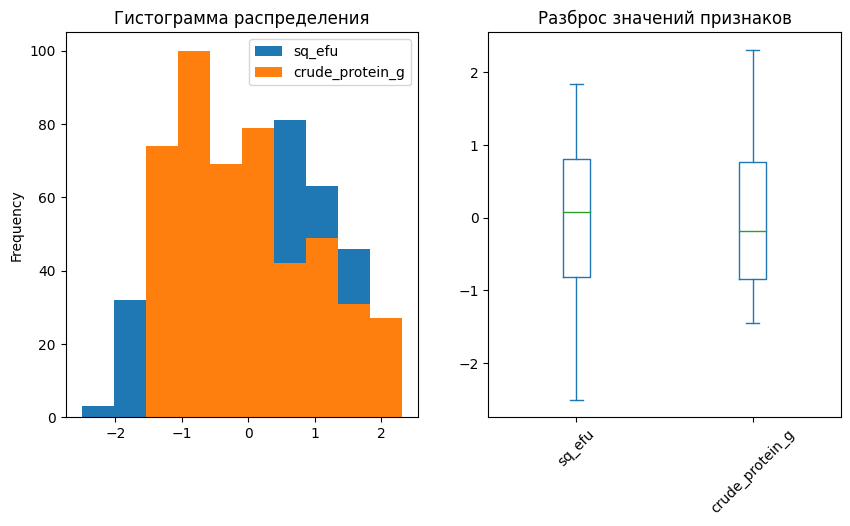

In [236]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()


In [237]:
X_train[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

,mean,std
sq_efu,0.0,1.0011
crude_protein_g,-0.0,1.0011


##### 5.3.3 Обучаем третью модель

In [238]:

# инициализируйте модель линейной регрессии
model_lr_3  = LinearRegression()

# обучите модель на тренировочных данных
model_lr_3.fit(X_train, y_train)

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions_3 = model_lr_3.predict(X_test)

# посчитайте среднюю абсолютную ошибку на тестовых данных и выведите её на экран
mae_3 = mean_absolute_error(y_test, predictions_3)
print(f'MAE = {mae_3:.0f}')


MAE = 149


Считаем коэффициент детерминации R2

In [239]:
r2_3 = r2_score(y_test, predictions_3) 
r2_3

0.8180879926867503

Итого видим, что:
- средняя ошибка модели по модулю немного выросла -  на 3 кг молока в год
- точность модели - немного упала (меньше 1 процента)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Возможно после исправления ошибок выше что-то изменится.  По идее, каждая следующая модель должна давать нам улучшение метрики


<div class="alert alert-info"> <b>Комментарии студента:</b> нет, обрати внимание вот на что:

- первая модель - уже включает в себя признак имя быка (я сразу примерджил его, чтобы использовать при прогнозировании)
- вторая модель - это она же, только улучшенная по линейной взаимосвязи параметров ЭКЕ и СПО
- третья модель - вот тут я в задании увидел, что имя быка нужно было добавить только на этом этапе. поэтому я искусственно удалил его, чтобы показать, что модель без него работает хуже

</div>

#### 5.4 Сведем метрики трех моделей в одну таблицу

In [240]:
X.head()

,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bull_name
0,14.2,1743,0.890,0,0,0,1,Буйный
1,12.8,2138,0.890,0,0,1,0,Соловчик
2,14.0,1854,0.885,1,1,1,1,Барин
3,12.4,2012,0.885,1,1,0,1,Буйный
4,12.8,1675,0.885,0,0,1,0,Барин


In [241]:
X_first = X.copy(deep=True)

In [242]:
X_new.head()

,crude_protein_g,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bull_name,spr_is_less_091,sq_efu
0,1743,0,0,0,1,Буйный,1,201.64
1,2138,0,0,1,0,Соловчик,1,163.84
2,1854,1,1,1,1,Барин,1,196.00
3,2012,1,1,0,1,Буйный,1,153.76
4,1675,0,0,1,0,Барин,1,163.84


In [243]:
X_witout_bull_name.head()

,crude_protein_g,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,spr_is_less_091,sq_efu
0,1743,0,0,0,1,1,201.64
1,2138,0,0,1,0,1,163.84
2,1854,1,1,1,1,1,196.00
3,2012,1,1,0,1,1,153.76
4,1675,0,0,1,0,1,163.84


Заведем функцию расчета метрик для разных входных данных: 
- X_first (самые первые данные), 
- X_new (после приведения СПО в бинарный вид и ЭКЕ в квадрате), 
- X_without_bull_name (после исключения имени быка)

In [244]:
def metrics_calculation(some_X):

    RANDOM_STATE=42

    X_train, X_test, y_train, y_test = train_test_split(
        some_X, 
        y, 
        random_state=RANDOM_STATE)

    # задаем условие выбора столбцов для масштабирования
    if list(some_X.columns) == list(X_first.columns):
        num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio']

        #кодируем имя быка
        encoder = OneHotEncoder(sparse=False, drop='first')
        X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
        X_test_ohe = encoder.transform(X_test[['bull_name']])
        encoder_col_names = encoder.get_feature_names_out()
        X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
        X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

        #добавляем столбцы без кодировки
        X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)
        X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)

    elif list(some_X.columns) == list(X_new.columns):
        num_col_names = ['sq_efu', 'crude_protein_g']

        #кодируем имя быка
        encoder = OneHotEncoder(sparse=False, drop='first')
        X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
        X_test_ohe = encoder.transform(X_test[['bull_name']])
        encoder_col_names = encoder.get_feature_names_out()
        X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
        X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


        # добавляем столбцы без кодировки
        X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)
        X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

    
    elif list(some_X.columns) == list(X_witout_bull_name.columns):
        num_col_names = ['sq_efu', 'crude_protein_g']

        X_train_ohe, X_test_ohe = [], []

        # добавляем столбцы без кодировки
        X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)
        X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

        

    # масштабируем количественные признаки
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



    ### сшиваем данные вместе

    if len(X_train_ohe) !=0:
        X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
        X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)
    
    else:
        X_train = pd.concat([X_train_non_encoded, X_train_scaled], axis=1)
        X_test = pd.concat([X_test_non_encoded, X_test_scaled], axis=1)

    ### переименовываем столбцы
    X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

    X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)

    # обучаем модель
    model_lr_func  = LinearRegression()
    model_lr_func.fit(X_train, y_train)
    func_predictions = model_lr_func.predict(X_test)

    mae_func = mean_absolute_error(y_test, func_predictions)
    mse_func= mean_squared_error(y_test, func_predictions)
    rmse_func= mean_squared_error(y_test, func_predictions, squared=False)
    r2_func= r2_score(y_test, func_predictions)

    return {'mae': mae_func,
            'mse': mse_func,
            'rmse':rmse_func,
            'R2': r2_func}


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Я как раз предлагал написать что-то вроде такой функции, и использовать его на предыдущих стадиях.  Я бы на твоём месте ещё раз подумал о архитектуре кода и использовании функций. Ты можешь со мной не соглашаться, но не вижу чтобы твоя функция делала код читабельней.  Получается ты пишешь целую функцию для того чтобы посчитать метрики, опять в который раз обучая модель, делай сплиты итд, хотя это было уже сделано выше 


<div class="alert alert-info"> <b>Комментарии студента:</b> я полностью согласен с тобой. в процессе написания кода я вижу, что громозкиие вещи нужно убирать. Проблема в том, что на этом этапе переписать нужно значительную часть кода. Прошу отнестись с пониманием, я буду продумывать архитектуру тщательнее</div>

In [245]:
metrics_calculation(some_X= X_first)

{'mae': 155.676252309263,
 'mse': 40115.812841315725,
 'rmse': 200.28932283403358,
 'R2': 0.8029336092311704}

In [246]:
metrics_calculation(some_X= X_new)

{'mae': 146.16302445362317,
 'mse': 35673.88988618194,
 'rmse': 188.87532895055918,
 'R2': 0.8247542745210407}

In [247]:
metrics_calculation(some_X= X_witout_bull_name)

{'mae': 149.039652223646,
 'mse': 37030.91131113694,
 'rmse': 192.4341739690145,
 'R2': 0.8180879926867503}

Сводим метрики в единую таблицу

In [248]:

models_metrics_df = pd.DataFrame([metrics_calculation(some_X= X_first),
                                  metrics_calculation(some_X= X_new),
                                  metrics_calculation(some_X= X_witout_bull_name)], 
                                 
                                 index=['model_1', 'model_2', 'model_3'])

# Добавляем столбец с описанием
models_metrics_df['sub'] = ['До настройки', 'После настройки', 'После настройки без имени быка']

models_metrics_df.round({'mae':0, 'mse': 0, 'rmse':0, 'R2':3})



,mae,mse,rmse,R2,sub
model_1,156.0,40116.0,200.0,0.803,До настройки
model_2,146.0,35674.0,189.0,0.825,После настройки
model_3,149.0,37031.0,192.0,0.818,После настройки без имени быка


Вывод: модель 2 самая лучшая.

#### 5.5 Прогноз удоя коров, которые рассматриваются для покупки

Повторим все операции шага 5.2 (потому что X_test перезаписан )

In [249]:
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_new, 
    y, 
    random_state=RANDOM_STATE)


num_col_names = ['sq_efu', 'crude_protein_g']

#кодируем имя быка
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
X_test_ohe = encoder.transform(X_test[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


# добавляем столбцы без кодировки
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)
X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)


# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



### сшиваем данные вместе

if len(X_train_ohe) !=0:
    X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

else:
    X_train = pd.concat([X_train_non_encoded, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_non_encoded, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                    'bull_name_Геркулес': 'bname_is_herc',
                    'bull_name_Соловчик': 'bname_is_sol'},
                    inplace=True)

# обучаем модель
model_lr_best  = LinearRegression()
model_lr_best.fit(X_train, y_train)
func_predictions = model_lr_best.predict(X_test)

mae_func = mean_absolute_error(y_test, func_predictions)
mse_func= mean_squared_error(y_test, func_predictions)
rmse_func= mean_squared_error(y_test, func_predictions, squared=False)
r2_func= r2_score(y_test, func_predictions)

print({'mae': mae_func,
        'mse': mse_func,
        'rmse':rmse_func,
        'R2': r2_func})


{'mae': 146.16302445362317, 'mse': 35673.88988618194, 'rmse': 188.87532895055918, 'R2': 0.8247542745210407}


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Опять сплиты, опять кодирование, опять шкалирование.  Сколько можно? Мы делаем сплит один раз, encoder, scaler у нас уже обучен. Зачем идти дублирования?


<div class="alert alert-info"> <b>Комментарии студента:</b> так я убеждался в том, что все мои данные носят "последний" характер - X_train, X_test и так далее. Ведь при обучении моделей мне приходилось их перезаписывать, особенно при переходе к третьей модели без признака имя быка. Пришлось снова обучать модель на вторых данных, ведь модель 2 самая лучшая по метрикам

Согласен, выглядит коряво. Просто чтобы это исправить, повторюсь, нужно переписать значительную часть кода. 
</div>

Лучшая модель model_lr_best сформирована, переходим к подготовке данных для предсказания удоя

In [250]:
cow_buy_df

,cow_is_sovering,pasture_is_hill,bull_is_sovering,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
0,0,1,0,Геркулес,3.58,3.076,1
1,0,0,1,Буйный,3.54,3.081,0
2,1,0,1,Барин,3.59,3.074,1
3,1,1,0,Буйный,3.40,3.061,1
4,1,0,0,Буйный,3.64,3.074,1
5,1,0,1,Геркулес,3.63,3.053,0
6,0,0,1,Буйный,3.57,3.079,1
7,1,1,0,Буйный,3.40,3.079,0
8,0,1,1,Соловчик,3.73,3.055,1
9,1,0,1,Геркулес,3.73,3.073,1


In [251]:

#кодируем имя быка, используя тот же кодировщик

encoded_bull_name = encoder.transform(cow_buy_df[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
encoded_bull_name = pd.DataFrame(encoded_bull_name, columns=[encoder_col_names])

encoded_bull_name


,bull_name_Буйный,bull_name_Геркулес,bull_name_Соловчик
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


Создаем датафрейм для предсказаний удоя cow_buy_df_for_MY (milk_yield), подготовленный по такому же принципу, как обучена модель

In [252]:
cow_buy_df_for_MY = pd.concat([cow_buy_df[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering','is_old']],
                            encoded_bull_name], axis=1)\
                    .rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'})

In [253]:
cow_buy_df_for_MY

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bname_is_bui,bname_is_herc,bname_is_sol
0,0,1,0,1,0.0,1.0,0.0
1,0,0,1,0,1.0,0.0,0.0
2,1,0,1,1,0.0,0.0,0.0
3,1,1,0,1,1.0,0.0,0.0
4,1,0,0,1,1.0,0.0,0.0
5,1,0,1,0,0.0,1.0,0.0
6,0,0,1,1,1.0,0.0,0.0
7,1,1,0,0,1.0,0.0,0.0
8,0,1,1,1,0.0,0.0,1.0
9,1,0,1,1,0.0,1.0,0.0


Теперь добавим в этот датасет недостающие значения ЭКЕ , сырого протеина и СПО - данные возьмем из датасета ferma_df% используем средние значения и добавим 5%.

Причина: Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

In [254]:
mean_efu = ferma_df.energy_feed_unity.mean() * 1.05
mean_spr = ferma_df.sugar_protein_ratio.mean() * 1.05
mean_protein = ferma_df.crude_protein_g.mean() * 1.05

In [255]:
mean_spr

0.9587436305732484

При этом мы видим, что среднее значение СПО +5% = 0.96

это больше определенного нами порога в 0.91 , а значит весь столбец spr_is_less_091 мы заполним значением 0 (False)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Это замечательно что мы видим, но насколько было бы  универсальней и чище, если бы мы написали функцию которой бы относила к нулю или единичке в зависимости от значения СПО, и применяли бы ее ко всем датасетам.  А так это похоже на ручной труд, если наши данные чуть-чуть поменяются надо будет вручную всё исправлять


In [256]:
cow_buy_df_for_MY['sq_efu'] = mean_efu **2
cow_buy_df_for_MY['crude_protein_g'] = mean_protein 
cow_buy_df_for_MY['spr_is_less_091'] = 0 

In [257]:
cow_buy_df_for_MY

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bname_is_bui,bname_is_herc,bname_is_sol,sq_efu,crude_protein_g,spr_is_less_091
0,0,1,0,1,0.0,1.0,0.0,233.361138,2019.947532,0
1,0,0,1,0,1.0,0.0,0.0,233.361138,2019.947532,0
2,1,0,1,1,0.0,0.0,0.0,233.361138,2019.947532,0
3,1,1,0,1,1.0,0.0,0.0,233.361138,2019.947532,0
4,1,0,0,1,1.0,0.0,0.0,233.361138,2019.947532,0
5,1,0,1,0,0.0,1.0,0.0,233.361138,2019.947532,0
6,0,0,1,1,1.0,0.0,0.0,233.361138,2019.947532,0
7,1,1,0,0,1.0,0.0,0.0,233.361138,2019.947532,0
8,0,1,1,1,0.0,0.0,1.0,233.361138,2019.947532,0
9,1,0,1,1,0.0,1.0,0.0,233.361138,2019.947532,0


Остается отмасштабировать значения ЭКЕ (возведенного в квадрат) и значения сырого протеина

In [258]:
num_col_names

['sq_efu', 'crude_protein_g']

In [259]:

cb_scaled = scaler.transform(cow_buy_df_for_MY[num_col_names])
cb_scaled = pd.DataFrame(cb_scaled, columns=num_col_names)
cb_scaled

,sq_efu,crude_protein_g
0,0.542248,0.517384
1,0.542248,0.517384
2,0.542248,0.517384
3,0.542248,0.517384
4,0.542248,0.517384
5,0.542248,0.517384
6,0.542248,0.517384
7,0.542248,0.517384
8,0.542248,0.517384
9,0.542248,0.517384



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:






- Тут иногда ошибаются, обучая  scaler и encoder  на cow_buy. У тебя всё верно, используешь scaler и encoder обученные на train  (Можешь своими словами объяснть почему мы делаем именно так?)
   



<div class="alert alert-warning">



Совет: 





- иногда бывает что в тестовой выборке оказывается категории которые, отсутствуют в обучающей,  в этом случаи можно использовать параметр handle_unknown='ignore'



<div class="alert alert-info"> <b>Комментарии студента:</b> думаю да. Обучая scaler и encoder на cow_buy, мы по сути "покажем" им тестовые (а в данном случае контрольные данные), на основании которых мы собираемся предсказывать. А если модель их "увидит" заранее - какой в ней будет толк?

Верно?
</div>

<div class="alert alert-info"> <b>Комментарии студента2:</b> блин, классно) хороший параметр с ignore - не учитывать признаки, которых нет у контрольной выборки) Зато если запустишь такую модель на данных, где этих признаков нет БЕЗ ЭТОГО параметра, то сразу увидишь ошибку и поймешь, что что-то упустил)
</div>

Соединяем все в один датасет

In [260]:
cow_buy_df_for_MY = pd.concat([cow_buy_df_for_MY.drop(num_col_names, axis=1),
           cb_scaled],
           axis=1)

In [261]:
cow_buy_df_for_MY

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bname_is_bui,bname_is_herc,bname_is_sol,spr_is_less_091,sq_efu,crude_protein_g
0,0,1,0,1,0.0,1.0,0.0,0,0.542248,0.517384
1,0,0,1,0,1.0,0.0,0.0,0,0.542248,0.517384
2,1,0,1,1,0.0,0.0,0.0,0,0.542248,0.517384
3,1,1,0,1,1.0,0.0,0.0,0,0.542248,0.517384
4,1,0,0,1,1.0,0.0,0.0,0,0.542248,0.517384
5,1,0,1,0,0.0,1.0,0.0,0,0.542248,0.517384
6,0,0,1,1,1.0,0.0,0.0,0,0.542248,0.517384
7,1,1,0,0,1.0,0.0,0.0,0,0.542248,0.517384
8,0,1,1,1,0.0,0.0,1.0,0,0.542248,0.517384
9,1,0,1,1,0.0,1.0,0.0,0,0.542248,0.517384


In [262]:
X_train.columns

Index(['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'spr_is_less_091', 'bname_is_bui', 'bname_is_herc', 'bname_is_sol',
       'sq_efu', 'crude_protein_g'],
      dtype='object')

Приводим в тот же порядок признаков, как и тернировочном датасете

In [263]:
cow_buy_df_for_MY = cow_buy_df_for_MY[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'spr_is_less_091', 'bname_is_bui', 'bname_is_herc', 'bname_is_sol',
       'sq_efu', 'crude_protein_g']]

Предсказываем значения удоя

In [264]:
milk_yied_pred = model_lr_best.predict(cow_buy_df_for_MY)
milk_yied_pred

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6571.25973712, 6400.54066779,
       6344.70785976, 6617.92892634, 6609.91929681, 6127.4747423 ,
       6593.08937654, 6344.70785976, 6425.38021759, 6571.25973712])

Посмотрим на коров с предсказанным удоем

In [265]:
cb_my_predicted= cow_buy_df.copy(deep=True)
cb_my_predicted['milk_yield_pred'] = milk_yied_pred.round(0)
cb_my_predicted

,cow_is_sovering,pasture_is_hill,bull_is_sovering,bull_name,milk_fat_percent,percent_protein_in_milk,is_old,milk_yield_pred
0,0,1,0,Геркулес,3.58,3.076,1,6610.0
1,0,0,1,Буйный,3.54,3.081,0,6379.0
2,1,0,1,Барин,3.59,3.074,1,6284.0
3,1,1,0,Буйный,3.40,3.061,1,6593.0
4,1,0,0,Буйный,3.64,3.074,1,6542.0
5,1,0,1,Геркулес,3.63,3.053,0,6425.0
6,0,0,1,Буйный,3.57,3.079,1,6571.0
7,1,1,0,Буйный,3.40,3.079,0,6401.0
8,0,1,1,Соловчик,3.73,3.055,1,6345.0
9,1,0,1,Геркулес,3.73,3.073,1,6618.0


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:





Отлично,  осталось только почитать доверительный интервал для нашего прогноза.


- для этого можно воспользоваться np.quantile(a, 0.975)
    

- stats.t.ppf() из библиотеки scipy, [пример](https://www.codecamp.ru/blog/confidence-intervals-python/)

   
    

<div class="alert alert-warning">


Совет: 


- можешь объяснить как мы можем использовать эту информацию?


<div class="alert alert-info"> <b>Комментарии студента:</b> Хм, упустил. добавил ниже


Эта информация позволит нам убедиться в том, что ожидаемый удой коров не ниже, чем заявленный фермером - 6000 кг в год. Если бы 6000 попадало в наш интервал - был бы повод задуматься на этом этапе - а все ли коровы нам интересны

Или зачем-то еще?
</div>

In [307]:
display(np.quantile(milk_yied_pred, 0.025), np.quantile(milk_yied_pred, 0.975))



6186.171629687247

6614.925315268527

Доверительный интервал для предсказанных значений удоя коров на продажу составляет (6186, 6615)

Это значит, что 95% всех значений удоя лежит в этом диапазоне


### Шаг 6. Логистическая Регрессия (классификация)

In [266]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old,bull_name
0,1,5863,14.2,1743,0.890,0,0,0,3.58,3.076,1,1,Буйный
1,2,5529,12.8,2138,0.890,0,0,1,3.54,3.079,1,0,Соловчик
2,3,5810,14.0,1854,0.885,1,1,1,3.59,3.074,0,1,Барин
3,4,5895,12.4,2012,0.885,1,1,0,3.40,3.075,0,1,Буйный
4,5,5302,12.8,1675,0.885,0,0,1,3.73,3.073,1,0,Барин


#### 6.1 Подготовим данные для классификации

На основании имеющихся данных по новым коровам мы можем использовать:
- породу коровы
- тип пастбища
- породу быка
- имя быка
- жирность молока
- процент белка в молоке
- информацию о корме возьмем из прошлого шага (среднее значение +5%)
- возраст коровы

In [267]:
ferma_df.columns

Index(['id', 'milk_yield_kg', 'energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_tasty', 'is_old', 'bull_name'],
      dtype='object')

In [268]:
X_classif= ferma_df[['energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_old', 'bull_name']]

y_classif = ferma_df.is_tasty

In [269]:
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_classif, 
    y_classif, 
    random_state=RANDOM_STATE)


num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio','milk_fat_percent', 'percent_protein_in_milk']


#кодируем имя быка
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
X_test_ohe = encoder.transform(X_test[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


# добавляем столбцы без кодировки
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)
X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', ]].reset_index(drop=True)


# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                    'bull_name_Геркулес': 'bname_is_herc',
                    'bull_name_Соловчик': 'bname_is_sol'},
                    inplace=True)





<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Верно - жирность и белок возвращаем

    
    
<div class="alert alert-warning">


Совет 🤔:


    
- Антон, а тебе самому нравится всё время делать: 
    
    
    
    ### переименовываем столбцы
    X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

    X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)
    
    
Зачем это всё? Сначала назвал одним способом, а потом другим. Код должен быть лаконичный и понятный, а так как будто ты хочешь спрятать концы в воду    
    
    
- Можно провести мини-исследование влияние признаков для задачи класификации, построив графики  распределений в разбивке по таргету - "вкусность". Выше у нас была задача регрессии поэтому такого рода разбиения мы не использовали, а тут будет очень неплохо глянуть и сделать выводы.  
    
    
 



- обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут



    

<div class="alert alert-info"> <b>Комментарии студента:</b> Марат, конечно не очень нравится.

Но я в процессе работы над проектом старался делать названия столбцов читаемыми и в правильном формате. Меня жутко бесит, что кодировщик превратил имена быков в кортежи уууууу!)))
</div>

In [270]:
X_train.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bname_is_bui,bname_is_herc,bname_is_sol,energy_feed_unity,crude_protein_g,sugar_protein_ratio,milk_fat_percent,percent_protein_in_milk
0,1,1,1,1,0.0,0.0,1.0,1.502378,1.079523,0.837130,0.562532,-0.679069
1,1,1,1,0,0.0,0.0,0.0,-1.557270,-0.196920,-0.703660,-1.601817,-1.452568
2,0,0,0,1,1.0,0.0,0.0,0.125537,-1.386085,-1.011818,-2.563750,1.254677
3,0,1,0,1,1.0,0.0,0.0,-0.103937,0.752230,0.837130,0.081565,1.254677
4,0,0,0,1,0.0,1.0,0.0,-1.098323,0.828598,-0.703660,0.201807,0.094429


In [271]:
X_test.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,bname_is_bui,bname_is_herc,bname_is_sol,energy_feed_unity,crude_protein_g,sugar_protein_ratio,milk_fat_percent,percent_protein_in_milk
0,0,1,0,1,0.0,1.0,0.0,-0.486393,-0.813322,-1.011818,0.201807,0.094429
1,1,1,1,1,0.0,0.0,1.0,1.425887,0.026730,0.837130,0.622652,-1.065819
2,1,1,1,0,0.0,0.0,0.0,-0.486393,-0.682405,-1.628134,0.141686,0.094429
3,0,0,1,1,0.0,0.0,0.0,-0.945340,-1.058792,-1.011818,0.081565,-0.679069
4,0,1,1,1,0.0,0.0,0.0,0.584484,-1.413360,-0.703660,0.081565,0.094429


Проверям корректность кодировки

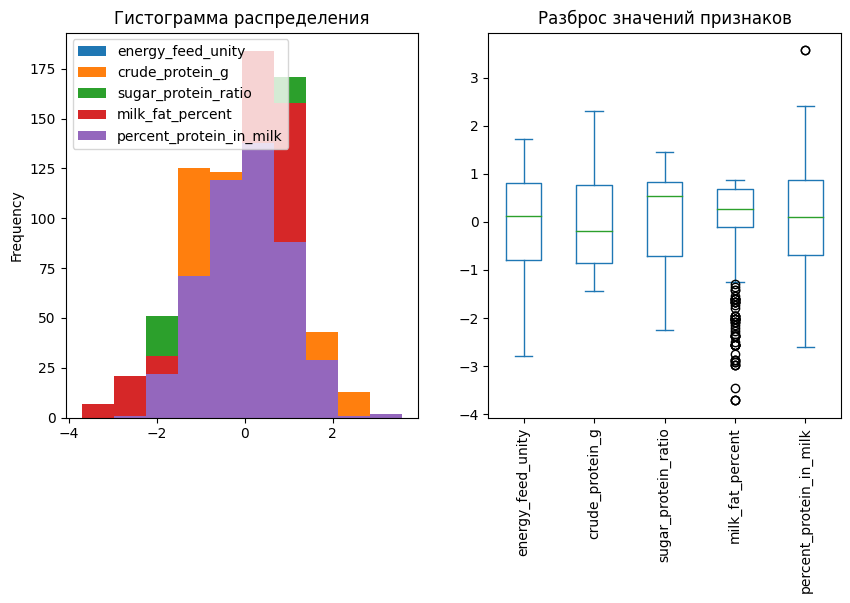

In [272]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
axes[0].legend(loc= 'upper left')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=90)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данные готовы, будем обучать модель.

#### 6.2 Обучаем модель логистической регрессии

In [273]:
clf_1 = LogisticRegression()

# обучаем модель на данных
clf_1.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred_cl = clf_1.predict(X_test)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred_cl)
print(acc)

0.6114649681528662


Точность очень низкая - всего 61%

Снова посмотрим на корреляцию признаков между собой

Построим тепловую карту корреляции числовых признаков Фермы


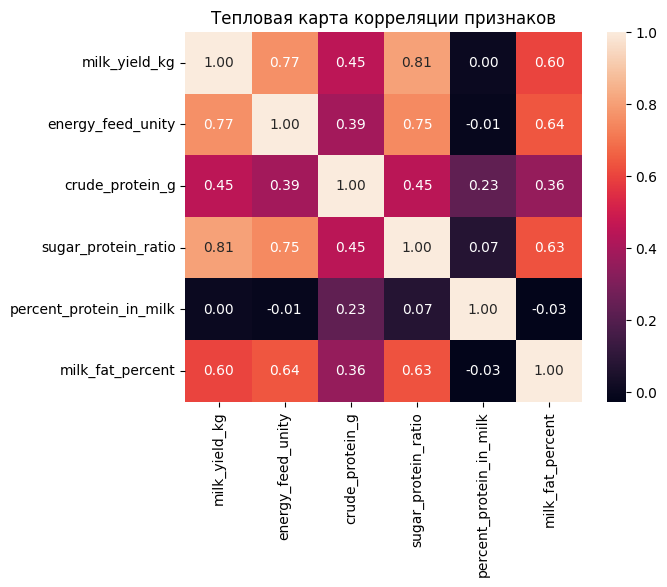

In [274]:
ax = plt.axes()
sns.heatmap(ferma_df[numeric_columns+discrete_columns].corr(), annot=True, fmt='.2f', ax=ax)

ax.set_title('Тепловая карта корреляции признаков')
plt.show()




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

    
    

Совет: 


   
- было бы интересно посмотреть на  корреляцию таргета с признаками, но наш таргет категориальный, поэтому  Спирмен или Пирсон не подходят, но есть такая библиотека [phik](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7), ее особенности: работа с разными типами данных, в том числе категориальными, учет нелинейных отношений, плюс отличная интерпретация и визуализация


<div class="alert alert-info"> <b>Комментарии студента:</b> вот с этой библиотекой я пока так и не разобрался!

Она меня заинтересовала еще на лекции, я сразу же поставил ее через pip3 как обычно. Но при попытке ее импортровать я получаю ошибку - нет, говорит, у тебя такого модуля. оооочень странно! но я разберусь, штука звучит очень кайфово

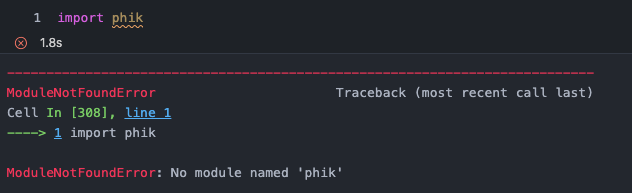
</div>

Что видим по признакам

2) Процент содержания белка: 
    - немного коррелирует с содержанием белка в корме 
    - но больше ни с чем

3) Жирность молока:
    - неплохо коррелирует с ЭКЕ и сахаро-протеиновым соотношением
    - похуже - с содержанием белка в корме
    - и никак - с содержанием белка в молоке

это нормально - очень важно, чем ты кормишь корову

4) ЭКЕ:
    - неплохо коррелирует с сахаро-белковым соотношением и жирностью молока, 
    - чуть хуже с содержанием протеина в корме 
    - и никак - с содержанием белка в молоке







<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



    Вывод - стоит задуматься над исключением ЭКЕ и СПО из входных признаков модели.

    
Почему?   До мультиколлинеарности явно не дотягивает, ну если что можешь провести дополнительный анализ с помощью VIF 

<div class="alert alert-info"> <b>Комментарии студента:</b> писал код в ночи, оставил себе напоминалку на след день. да, потом я отказался от этой идеи. Убираю из выводов</div>

Зафиксируем для себя веса признаков

In [275]:
# выводим веса коэффициентов
for feature_number, feature_name in enumerate(X_classif.columns):
    exp_weight = math.exp(clf_1.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

energy_feed_unity   : +1.04
crude_protein_g     : +1.64
sugar_protein_ratio : +1.08
cow_is_sovering     : +1.12
pasture_is_hill     : +0.79
bull_is_sovering    : +0.83
milk_fat_percent    : +0.65
percent_protein_in_milk: +1.39
is_old              : +1.09
bull_name           : +1.23


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- Действительно интересно посмотреть как именно признаки влияют на Таргет

    
- И здорово что учтено отношение шансов (odds ratio) 
    




<div class="alert alert-warning">
    
    


Совет 🤔:


    
Для линейной регрессии тоже можно было кстати посмотреть    

#### 6.3 Модель v2 после исключения признаков СПО и ЭКЕ 

Повторим все шаги, посмотрим как изменилась точность модели и веса признаков

In [276]:

X_classif_2= ferma_df[['crude_protein_g',
    'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_old', 'bull_name']]

y_classif = ferma_df.is_tasty
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_classif_2, 
    y_classif, 
    random_state=RANDOM_STATE)


num_col_names = ['crude_protein_g','milk_fat_percent', 'percent_protein_in_milk']


#кодируем имя быка
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
X_test_ohe = encoder.transform(X_test[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


# добавляем столбцы без кодировки
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)
X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', ]].reset_index(drop=True)


# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                    'bull_name_Геркулес': 'bname_is_herc',
                    'bull_name_Соловчик': 'bname_is_sol'},
                    inplace=True)


clf_2 = LogisticRegression()

# обучаем модель на данных
clf_2.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred_cl = clf_2.predict(X_test)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred_cl)
print(acc)




0.5605095541401274


In [277]:
# выводим веса коэффициентов
for feature_number, feature_name in enumerate(X_train.columns):
    exp_weight = math.exp(clf_2.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

cow_is_sovering     : +1.08
pasture_is_hill     : +1.70
bull_is_sovering    : +0.98
is_old              : +1.55
bname_is_bui        : +0.78
bname_is_herc       : +0.85
bname_is_sol        : +0.67
crude_protein_g     : +1.19
milk_fat_percent    : +1.12
percent_protein_in_milk: +1.28


Точность упала, веса признаков перераспределились. 

Будем работать с первой моделью с более полным перечнем признаков clf_1

#### 6.4 Метрики логистической регрессии

Точность модели - 61%


Теперь считаем precision и recall 

In [278]:
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_classif, 
    y_classif, 
    random_state=RANDOM_STATE)


num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio','milk_fat_percent', 'percent_protein_in_milk']


#кодируем имя быка
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
X_test_ohe = encoder.transform(X_test[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


# добавляем столбцы без кодировки
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)
X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', ]].reset_index(drop=True)


# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                    'bull_name_Геркулес': 'bname_is_herc',
                    'bull_name_Соловчик': 'bname_is_sol'},
                    inplace=True)

clf_1 = LogisticRegression()

# обучаем модель на данных
clf_1.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred_cl = clf_1.predict(X_test)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred_cl)
print(acc)


0.6114649681528662


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Опять сплиты, опять масштабирование,  OneHotEncoder...зачем? Разве нельзя было сделать один раз сплит, один раз OneHotEncoder, StandardScalerа затем просто посмотреть метрики на разных данных, беря только те столбцы которые тебя интересуют 


<div class="alert alert-info"> <b>Комментарии студента:</b> стремно, согласен(</div>

In [279]:
recall_1 = recall_score(y_test, y_pred_cl)
precision_1 = precision_score(y_test, y_pred_cl)

print('recall: ',round(recall_1 ,3))
print('precision: ',round(precision_1,3))

recall:  0.852
precision:  0.61


Строим матрицу ошибок

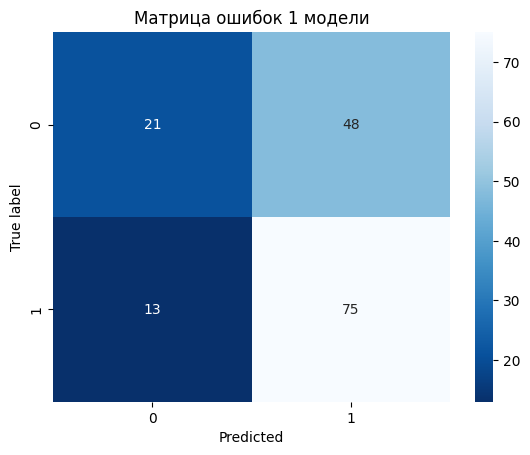

In [280]:

cm = confusion_matrix(y_test, y_pred_cl)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', ax=ax)

ax.set_title('Матрица ошибок 1 модели')


plt.ylabel('True label')
plt.xlabel('Predicted')

plt.show()

48 ошибок первого рода и 13 ошибок второго рода

Для нашей работы важно предсказания <font color='red'>Вкуса молока</font> или is_tasty (то есть "ВКУСНО"), а это значит, что важно не поставить как можно больше единичек (False Positive) , не боясь ошибиться, и обеспечить полноту - она нам не важна.

Нам важно , чтобы каждая выставленная единичка была максимально обоснована  - а значит мы должны ориентироваться на показатель <font color='green'>precision</font> .

Этот показатель отследит количество ошибок <font color='red'>первого</font>  рода - пока их слишком много.

#### 6.5 Порог логистической регрессии

Создаем таблицу с предсказанными значениями по порогу =0.5 (по умолчанию)

In [281]:
y_proba = clf_1.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

     y_valid   y_proba
85         1  0.843748
17         1  0.817884
110        1  0.816392
66         1  0.810089
116        0  0.808832


Зададим разные пороги

In [282]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 6,endpoint=False)]
print(thresholds)

[0.5, 0.58, 0.67, 0.75, 0.83, 0.92]


Посмотрим, как будут меняться ошибки первого рода для предсказаний на тестовой выборке

In [283]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('yp_'+str(i))
	data['yp_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  yp_0.5  yp_0.58  yp_0.67  yp_0.75  yp_0.83  yp_0.92
94         0  0.528062       1        0        0        0        0        0
127        1  0.402655       0        0        0        0        0        0
110        1  0.816392       1        1        1        1        0        0
12         1  0.663617       1        1        0        0        0        0
6          1  0.761448       1        1        1        1        0        0


In [284]:
print(data.sample(5))

     y_valid   y_proba  yp_0.5  yp_0.58  yp_0.67  yp_0.75  yp_0.83  yp_0.92
105        0  0.614003       1        1        0        0        0        0
92         1  0.571537       1        0        0        0        0        0
125        1  0.658701       1        1        0        0        0        0
75         0  0.501531       1        0        0        0        0        0
124        1  0.720366       1        1        1        0        0        0


In [285]:
data.head()

,y_valid,y_proba,yp_0.5,yp_0.58,yp_0.67,yp_0.75,yp_0.83,yp_0.92
85,1,0.843748,1,1,1,1,1,0
17,1,0.817884,1,1,1,1,0,0
110,1,0.816392,1,1,1,1,0,0
66,1,0.810089,1,1,1,1,0,0
116,0,0.808832,1,1,1,1,0,0


In [286]:
data[data.y_proba < 0.76].head(20)

,y_valid,y_proba,yp_0.5,yp_0.58,yp_0.67,yp_0.75,yp_0.83,yp_0.92
8,1,0.759778,1,1,1,1,0,0
7,1,0.753704,1,1,1,1,0,0
108,0,0.752956,1,1,1,1,0,0
10,1,0.752133,1,1,1,1,0,0
146,1,0.751031,1,1,1,1,0,0
31,0,0.749511,1,1,1,0,0,0
25,1,0.747926,1,1,1,0,0,0
150,0,0.747737,1,1,1,0,0,0
123,1,0.746695,1,1,1,0,0,0
151,0,0.745516,1,1,1,0,0,0


Учитывая, что мы гонимся за максимальной точностью выставления единичек (не должно быть ошибки типа валидационное значение =0 , предсказанное = 1), выбирать порог нужно от 0.5 и выше.

А исходя из информации выше, граница лежит где-то между 0.7 и 0.8 - потому что на границе в 0.67 ошибок в выставлении моделью единичек вместо нулей еще много, а на грнице в 0.83 - модель почти не ставит единички (то есть вкусного молока мочти нет)

Раздробим границу еще больше

In [287]:
thresholds = [round(i,2) for i in np.linspace(0.7,0.8,num = 6,endpoint=False)]
print(thresholds)

[0.7, 0.72, 0.73, 0.75, 0.77, 0.78]


In [288]:
y_proba = clf_1.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)


columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('yp_'+str(i))
	data['yp_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  yp_0.7  yp_0.72  yp_0.73  yp_0.75  yp_0.77  yp_0.78
152        1  0.706133       1        0        0        0        0        0
99         0  0.415430       0        0        0        0        0        0
23         1  0.330898       0        0        0        0        0        0
24         1  0.531601       0        0        0        0        0        0
9          0  0.420031       0        0        0        0        0        0


In [289]:
data_temp = data.copy(deep=True)

In [290]:
def fp_counter(edge_value):
    #задаем условие подсчета значений False positive : предсказанное значение =1 , валидационное = 0
    data_temp['is_false_positive'] = (data_temp[edge_value]== 1) & (data_temp['y_valid']== 0)
    fp_amount = data_temp.is_false_positive.sum()

    # задаем условие подсчета значений True positive : предсказанное значение =1 , валидационное = 1
    data_temp['is_true_positive'] = (data_temp[edge_value]== 1) & (data_temp['y_valid']== 1)
    tp_amount = data_temp.is_true_positive.sum()

    precision_func = tp_amount/ (tp_amount + fp_amount)

    return (fp_amount, precision_func)

In [291]:
data_temp.columns

Index(['y_valid', 'y_proba', 'yp_0.7', 'yp_0.72', 'yp_0.73', 'yp_0.75',
       'yp_0.77', 'yp_0.78'],
      dtype='object')

In [292]:
for name in ['yp_0.7', 'yp_0.72', 'yp_0.73', 'yp_0.75', 'yp_0.77', 'yp_0.78']:
    print(f'Для границы {name}: Количество ошибок первого рода = {fp_counter(name)[0]}, Presicion = {fp_counter(name)[1]}')
    print()

Для границы yp_0.7: Количество ошибок первого рода = 10, Presicion = 0.7777777777777778

Для границы yp_0.72: Количество ошибок первого рода = 9, Presicion = 0.775

Для границы yp_0.73: Количество ошибок первого рода = 9, Presicion = 0.7692307692307693

Для границы yp_0.75: Количество ошибок первого рода = 5, Presicion = 0.8148148148148148

Для границы yp_0.77: Количество ошибок первого рода = 2, Presicion = 0.875

Для границы yp_0.78: Количество ошибок первого рода = 2, Presicion = 0.8461538461538461



Вот и ответ - <font color='red'>оптимальное значение границы составляет **0.77**: </font>
- при ней количество ошибок первого рода (модель считает молоко вкусным, когда оно таковым не является) минимально = 2
- значение presicion - максимально = 0.875

Дальше (при увеличении границы) число значений True Positive будет снижаться (модель все чаще будет выставлять нули там, где истинное значение = 1)



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    
- найдено верное решение для минимизации риска плохого прогноза (стараемся занулить FP, поднимая presicion)  с помощью манипуляции порогом    
    


    
<div class="alert alert-warning">



Совет 🤔:





- вместо перебора по циклу можно было использовать precision_recall_curve, который возвращает три значения: precisions, recalls, thresholds 



- и почему бы не построить красивый график метрик для разных значений threshold







    





#### 6.6 Применяем порог логистической регрессии для предсказания модели

Напомним, значение presicion до изменения порога было 0.61

In [293]:
probabilities = clf_1.predict_proba(X_test)

threshold_new = 0.77

# Применяем новый порог классификации
predictions_new_threshold = (probabilities[:, 1] >= threshold_new).astype(int)

presicion_new = precision_score(y_test, predictions_new_threshold)

In [294]:
print(f'Новое значение precision со смещенным порогом равно {presicion_new}')

Новое значение precision со смещенным порогом равно 0.875


#### 6.7 Предскажем вкус молока коров на продажу

Сначала переведем данные в таблице cow_buy в нужную нам форму

In [295]:
cow_buy_df_for_ToM = cow_buy_df.copy(deep=True)

In [296]:
mean_efu = ferma_df.energy_feed_unity.mean() * 1.05
mean_spr = ferma_df.sugar_protein_ratio.mean() * 1.05
mean_protein = ferma_df.crude_protein_g.mean() * 1.05

cow_buy_df_for_ToM['energy_feed_unity'] = mean_efu 
cow_buy_df_for_ToM['crude_protein_g'] = mean_protein 
cow_buy_df_for_ToM['sugar_protein_ratio'] = mean_spr 

In [297]:
cow_buy_df_for_ToM.head()

,cow_is_sovering,pasture_is_hill,bull_is_sovering,bull_name,milk_fat_percent,percent_protein_in_milk,is_old,energy_feed_unity,crude_protein_g,sugar_protein_ratio
0,0,1,0,Геркулес,3.58,3.076,1,15.276162,2019.947532,0.958744
1,0,0,1,Буйный,3.54,3.081,0,15.276162,2019.947532,0.958744
2,1,0,1,Барин,3.59,3.074,1,15.276162,2019.947532,0.958744
3,1,1,0,Буйный,3.40,3.061,1,15.276162,2019.947532,0.958744
4,1,0,0,Буйный,3.64,3.074,1,15.276162,2019.947532,0.958744


In [298]:
num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio','milk_fat_percent', 'percent_protein_in_milk']


#кодируем имя быка

encoded_bull_name_2 = encoder.transform(cow_buy_df_for_ToM[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
encoded_bull_name_2 = pd.DataFrame(encoded_bull_name_2, columns=[encoder_col_names])


# добавляем столбцы без кодировки
none_coded= cow_buy_df_for_ToM[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)



# масштабируем количественные признаки

tom_scalled = scaler.transform(cow_buy_df_for_ToM[num_col_names])
tom_scalled = pd.DataFrame(tom_scalled, columns=num_col_names)




### сшиваем данные вместе

cow_buy_df_for_ToM = pd.concat([encoded_bull_name_2, none_coded, tom_scalled], axis=1)


### переименовываем столбцы
cow_buy_df_for_ToM.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)





In [299]:
cow_buy_df_for_ToM

,bname_is_bui,bname_is_herc,bname_is_sol,cow_is_sovering,pasture_is_hill,bull_is_sovering,is_old,energy_feed_unity,crude_protein_g,sugar_protein_ratio,milk_fat_percent,percent_protein_in_milk
0,0.0,1.0,0.0,0,1,0,1,0.56625,0.517384,1.41473,-0.158918,0.094429
1,1.0,0.0,0.0,0,0,1,0,0.56625,0.517384,1.41473,-0.399401,2.028176
2,0.0,0.0,0.0,1,0,1,1,0.56625,0.517384,1.41473,-0.098797,-0.679069
3,1.0,0.0,0.0,1,1,0,1,0.56625,0.517384,1.41473,-1.241093,-5.706810
4,1.0,0.0,0.0,1,0,0,1,0.56625,0.517384,1.41473,0.201807,-0.679069
5,0.0,1.0,0.0,1,0,1,0,0.56625,0.517384,1.41473,0.141686,-8.800805
6,1.0,0.0,0.0,0,0,1,1,0.56625,0.517384,1.41473,-0.219039,1.254677
7,1.0,0.0,0.0,1,1,0,0,0.56625,0.517384,1.41473,-1.241093,1.254677
8,0.0,0.0,1.0,0,1,1,1,0.56625,0.517384,1.41473,0.742894,-8.027306
9,0.0,1.0,0.0,1,0,1,1,0.56625,0.517384,1.41473,0.742894,-1.065819


In [300]:
X_test.columns

Index(['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'bname_is_bui', 'bname_is_herc', 'bname_is_sol', 'energy_feed_unity',
       'crude_protein_g', 'sugar_protein_ratio', 'milk_fat_percent',
       'percent_protein_in_milk'],
      dtype='object')

Приводим расположение столбцов в тот же порядок, что и в тестовых/тренировочных данных

In [301]:
cow_buy_df_for_ToM = cow_buy_df_for_ToM[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'bname_is_bui', 'bname_is_herc', 'bname_is_sol', 'energy_feed_unity',
       'crude_protein_g', 'sugar_protein_ratio', 'milk_fat_percent',
       'percent_protein_in_milk']]

Предскажем значения вкусности молока

In [302]:
taste_probab = clf_1.predict_proba(cow_buy_df_for_ToM)

threshold_new = 0.77

# Применяем новый порог классификации
is_tasty_predicted = (taste_probab[:, 1] >= threshold_new).astype(int)

is_tasty_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

Добавим в датасет по коровам информацию по вкусности молока

In [303]:

cb_my_predicted['is_tasty_pred'] = is_tasty_predicted
cb_my_predicted

,cow_is_sovering,pasture_is_hill,bull_is_sovering,bull_name,milk_fat_percent,percent_protein_in_milk,is_old,milk_yield_pred,is_tasty_pred
0,0,1,0,Геркулес,3.58,3.076,1,6610.0,0
1,0,0,1,Буйный,3.54,3.081,0,6379.0,0
2,1,0,1,Барин,3.59,3.074,1,6284.0,0
3,1,1,0,Буйный,3.40,3.061,1,6593.0,0
4,1,0,0,Буйный,3.64,3.074,1,6542.0,0
5,1,0,1,Геркулес,3.63,3.053,0,6425.0,0
6,0,0,1,Буйный,3.57,3.079,1,6571.0,0
7,1,1,0,Буйный,3.40,3.079,0,6401.0,1
8,0,1,1,Соловчик,3.73,3.055,1,6345.0,0
9,1,0,1,Геркулес,3.73,3.073,1,6618.0,0


In [304]:
cb_my_predicted.columns

Index(['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'bull_name',
       'milk_fat_percent', 'percent_protein_in_milk', 'is_old',
       'milk_yield_pred', 'is_tasty_pred'],
      dtype='object')

### Шаг 7. Итоги

In [305]:
cb_my_predicted = cb_my_predicted[['milk_yield_pred', 'is_tasty_pred', 'cow_is_sovering', 
                                   'pasture_is_hill', 'bull_is_sovering', 'bull_name',
                                   'milk_fat_percent', 'percent_protein_in_milk', 'is_old']]

Отберем коров, у которых:
- спрогнозированный удой больше 6000 кг в год
- молоко спрогнозировано как вкусное 

In [306]:
cb_my_predicted.query('milk_yield_pred > 6000 & is_tasty_pred ==1')

,milk_yield_pred,is_tasty_pred,cow_is_sovering,pasture_is_hill,bull_is_sovering,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
7,6401.0,1,1,1,0,Буйный,3.40,3.079,0
11,6127.0,1,0,1,1,Барин,3.42,3.075,0


<font color='red'>**Наши победительницы - 7 и 11 коровы:**</font> 
- молодые буренки
- пасутся на холмах
- имеют разных отцов (Буйный и барин)
- имеют жирность молока около 3.4
- имеют количествобелка в молоке - 3.075 - 3.079

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Отлично, рекомендации получены


Итак:

1) Рекомендую фермеру к покупке двух коров - именно для них минимальный риск ошибиться с вкусноснотой молока

2) Модели логистической и линейной регрессии, на основе которых сделаны предсказания, подобраны и настроены таким образом, чтобы:
    - потенциальные средние, среднеквадратичные ошибки удоя были сведены к минимуму (+- 146 кг молока в год) с точностью модели - 82,5%

    - вероятность получить ошибку в предсказании вкуса молока сведена к минимуму - молоко у выбранных коров будет вкусным с точностью 87.5%

3) Рекомендую фермеру выяснить чем кормили коров до покупки, особенно показатели ЭКЕ и Сырого протеина - это позволит точнее предсказать вкус молока и удой в первый год до перевода купленных коров на корм фермера

4) В задаче использованы:
    - линейная регрессия с поиском миниммизации ошибок модели с добавлением новых признаков, проверкой на мультиколлинеарность признаков, трансформацией признаков для достижения линейной зависимости между целевым признаком и входными признаками

    - логистическая регрессия с минимизацией ошибок первого рода (для исключения риска чрезмерного выставления положительных оценок, не являющихся истинными). Оценка качества модели сделана на  основе показателя presicion

5) Улучшить модели возможно: 
    - если добавить в модель новые признаки - узнать о коровах что-то новое, например как часто их доят, в какое время происходит надой, какой объем корма получает корова, болела ли корова за последние 5 месяцев и пр

    - каким-то образом трансформировать признаки, в целях приведения взаимосвязи с целевым в линейный вид

6) Для бизнеса важны обе метрики в задачах классификации - и precision, и recall. Их выбор зависит от целей задачи. 

Общий вывод по проекту:

1) Данные были предобработаны: исключены пустые значения, дубликаты (явные и неявные), формат данных приведен в правильный

2) Был проведен статистический анализ данных: 
    - построены графики гистограмм и boxplot для количественных признаков
    - построены графики столбчатых диаграмм для категориальных признаков
    - на основе графиков сделаны вывод о видах распределений, определены выбросы, приняты решения об улучшению данных

3) Был проведен корреляционный анализ:
    - на предмет выявления мультикорреляиции в данных. Не выявлено
    - на зависимость таргет признака от входных признаков. сделаны выводы

4) Данные подготовлены к прогнозированию: применены масштабирование и кодирование

5) Обучены модели линейной и логистической регрессии. Качество моделей оценивалось исходя из поставленной задачи: 
    - для предсказания удоя мы стремились к минимальному значению ошибок MAE, RMSE и максимальному значению R2
    - для предсказания вкуса молока мы стремились к минимизации ошибки первого рода и повышали метрику precision 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

В конце проекта принято кратко описывать все проделанные шаги и полученные результаты. Зачем это нужно - когда проект захочет посмотреть будущий работодатель, у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, но захочет изучить результат, который будет в общем выводе. Поэтому все же советую написать общий вывод пообьемней: добавить пару слов о данных, работе с ними, о моделях, метриках



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




    
Спасибо за работу Антон, но в настоящее время я не могу принять проект, поэтому пообщаемся ещё )



    
    

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    
В частности: 

    
    
- Подумай над архитектурой кода, сейчас я вижу огромное количество постоянных дубликатов. Проект можно сократить на добрую треть, при этом читабельность повысится
    
    
- Зачем ты вручную кодируешь категориальные признаки? Предлагаю не делать это вручную, а сделать это с помощью OHE. А так получается очень странная работа, имена через    OHE, остальное вручную  

    
- Функции пишем для того чтобы сделать код лаконичный и понятнее,  я тебе предложил какую функцию мы можем написать, присмотрись

      
    

Обязательное к исправлению:





    
- ошибка исполнения кода    
    
    
    
- не указан  decimal, а данные стоит сразу привести  к коректному виду

    
    
    
- у нас два типа данных - категориальные и количественные, для каждого из них строим соответствующий тип графика
    
    
    
 
- не забываем что Пирсона используем только если количественный признак распределён нормально
    
    
    
    
    
- для работы со всеми  категориальными признаками мы используем OHE, оставим ручную кодировку в прошлом
    
    
    
    
    
    
    

- не забываем рассчитать доверительный интервал

    
    
    
- дописываем общий вывод (лицо проекта) 

    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 
    

<div class="alert alert-info"> <b>Комментарии студента:</b> Марат, спасибо тебе большое за проверку,  советы забрал себе в копилку, буду использовать.

- ошибку кода поправил - версию sklearn установил последнюю

- decimal решил, тема вообще
- типы данных поправил, графики переделал

- с Пирсоном - Спирменом накосячил - исправился

- по кодировке понял. это я у Толи Карпова подсмотрел , когда его лекции еще на Степике смотрел, он вручную использовал там кодировку, мне понравилось) но ты прав, технологичнее все разом потом кодировать

- над архитектурой буду думать тщательнее

- доверительный интервал посчитал

- вывод дописал

.</div>